# **FINAL PROJECT 2** - Logistic Regression & SVM

Kelompok 8 - PYTN 012
- DWI PUJINING TYAS
- NUR ANISAH
- FATIMAH ZAHRA

## Perkenalan
Dataset yang digunakan adalah data Cuaca di Australia, dimana data tersebut berisi kumpulan informasi tentang kondisi cuaca harian di berbagai lokasi di Australia. Dataset ini mencakup berbagai atribut seperti tanggal, suhu maksimum dan minimum, curah hujan, kecepatan angin, tingkat kelembaban, tekanan udara, dan lain-lain. Tujuan dari dataset ini adalah untuk mempelajari dan menganalisis pola cuaca di Australia serta melakukan prediksi atau estimasi berbagai faktor cuaca berdasarkan data historis yang tersedia.

Dalam konteks apakah besok akan hujan (rain tomorrow), target yang ingin dicapai adalah prediksi terjadinya hujan atau tidak. Berdasarkan atribut-atribut cuaca historis seperti suhu, curah hujan, kecepatan angin, kelembaban, dan atribut lainnya, kita dapat membangun model prediksi yang akan memperkirakan apakah besok akan hujan (yes atau no).

Berbagai atribut cuaca seperti suhu maksimum dan minimum, curah hujan, kecepatan angin, tingkat kelembaban, dan lain-lain akan menjadi fitur-fitur penting dalam memprediksi apakah besok akan hujan. Dengan menganalisis pola dan hubungan antara atribut-atribut ini dengan kondisi hujan pada hari berikutnya, kita dapat membangun model yang dapat memprediksi hal tersebut dengan memperhatikan hasil akurasi untuk menentukan kesuksekan model tersebut. 

## Import Libraries

In [ ]:
# Library For DataFrame
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# For Data Exploration
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#For Transform Data
from sklearn.preprocessing import PowerTransformer
from numpy import exp

# For Evaluation
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# For Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score


# For ignore warning
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [ ]:
df = pd.read_csv('/content/weatherAUS.csv')
pd.set_option("display.max_columns", None)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000



## Data Cleaning

### Checking Duplicated Values

In [ ]:
df.duplicated().sum()

0

### Parse the Date Column into Datetime Format

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

### Create Day, Month, and Year Columns from Date

In [ ]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
df.drop('Date', axis=1, inplace=True)

Menghapus kolom Date karena sudah tidak diperlukan lagi 

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


### Check for Missing values in Categorical Variables

In [ ]:
categorical = [i for i in df.columns if df.dtypes[i]=='object']
print('Categorical Variables:', categorical)

Categorical Variables: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
# Replace missing categorical variables with most frequent value
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0],inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0],inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0],inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0],inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0],inplace=True)

In [ ]:
df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### Check for Missing Values in Numerical Variables

In [ ]:
numerical = [var for var in df.columns if df[var].dtype !='O']
print('Numerical Variables:', numerical)

Numerical Variables: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [ ]:
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Day                  0
Month                0
Year                 0
dtype: int64

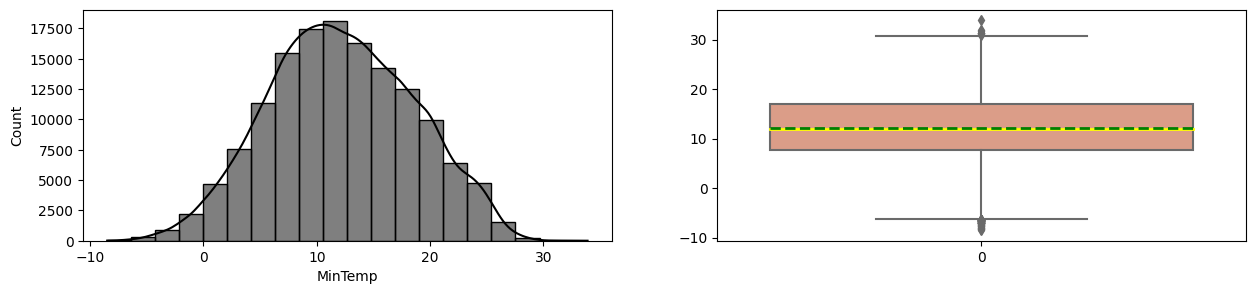

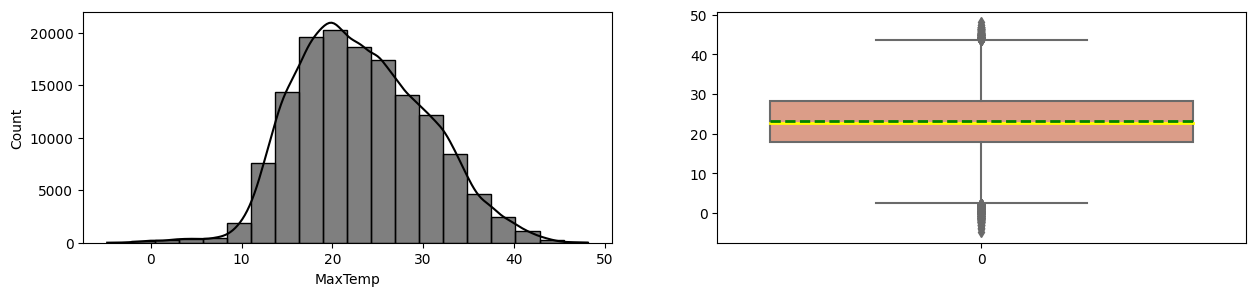

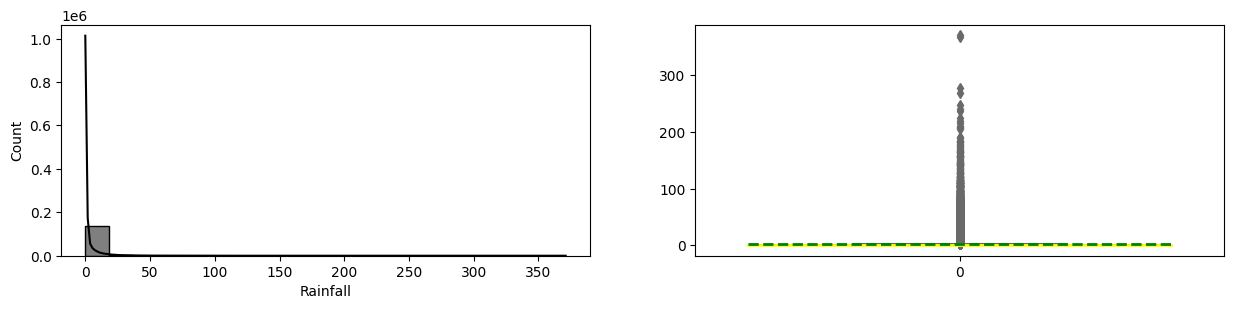

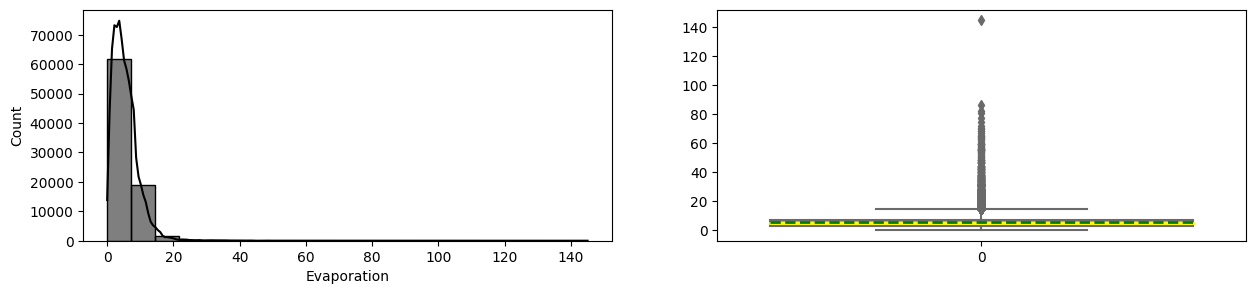

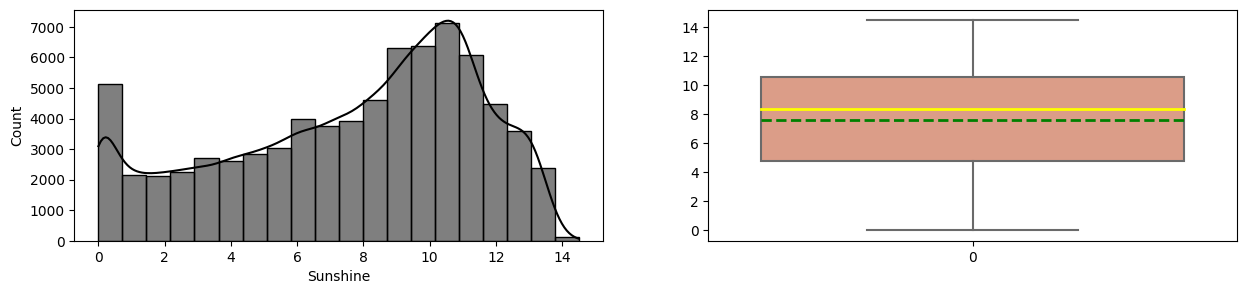

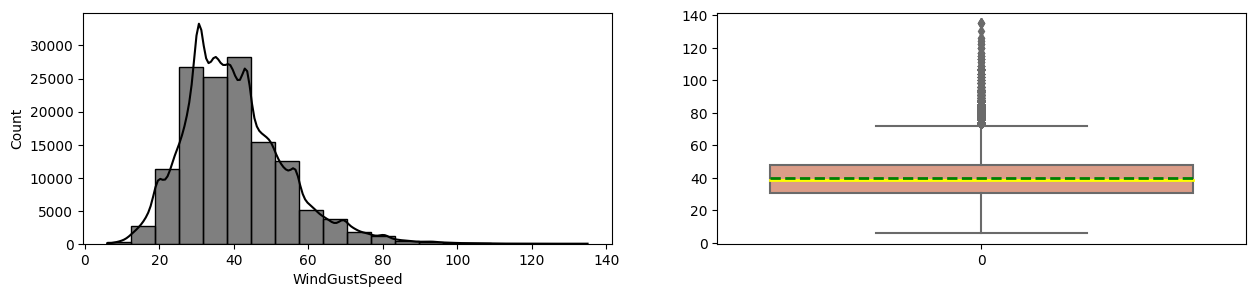

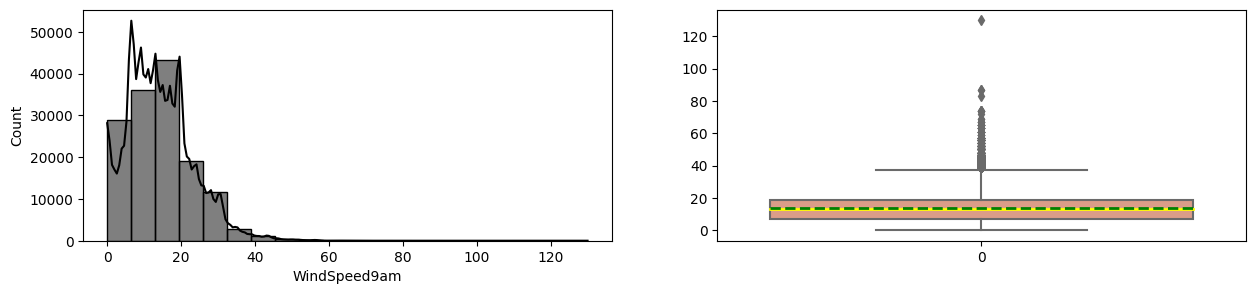

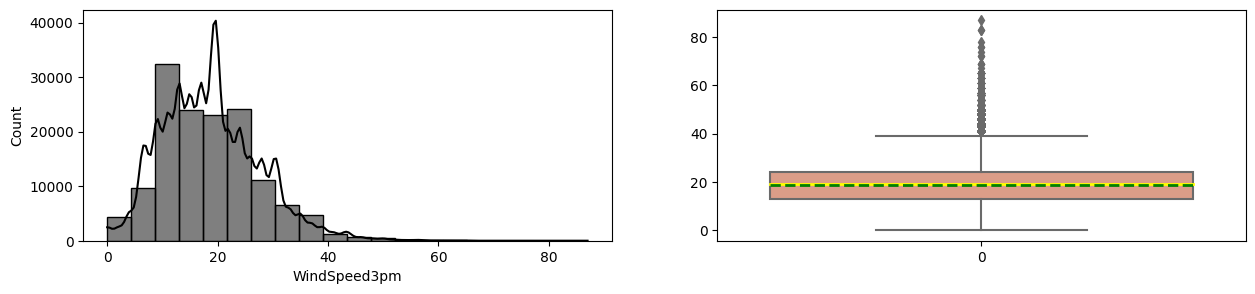

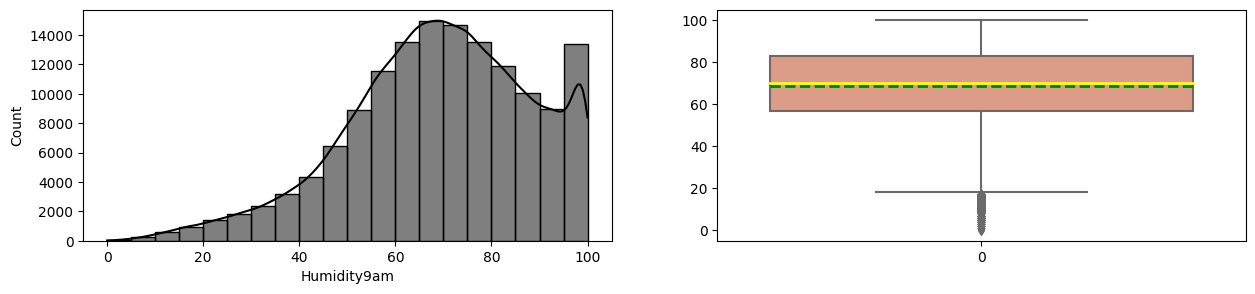

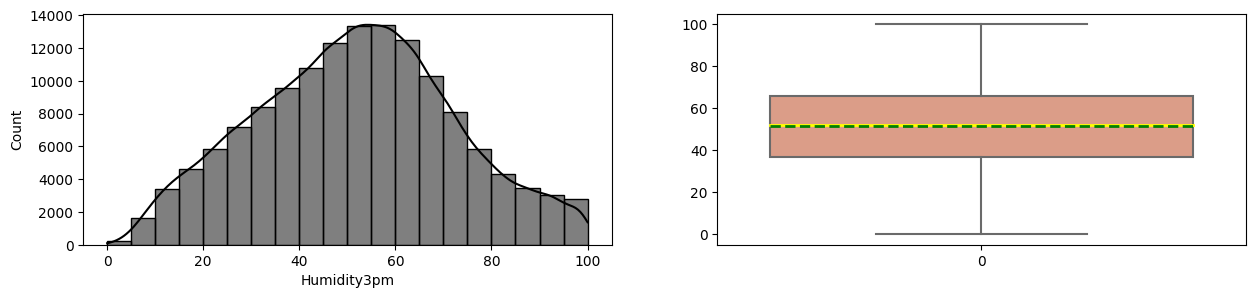

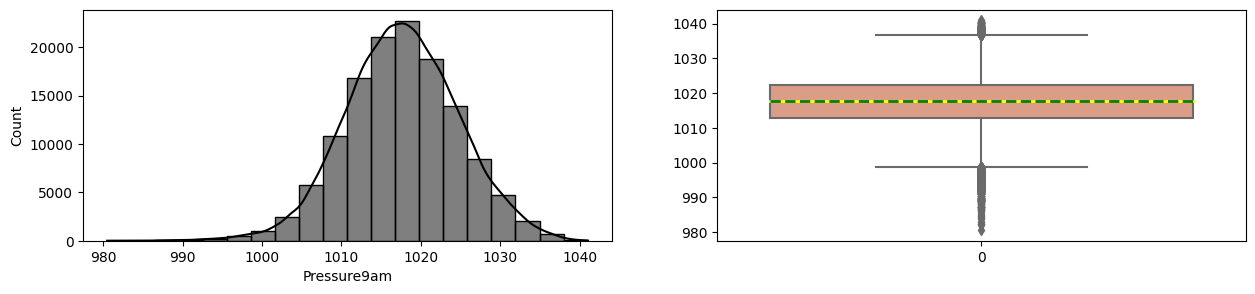

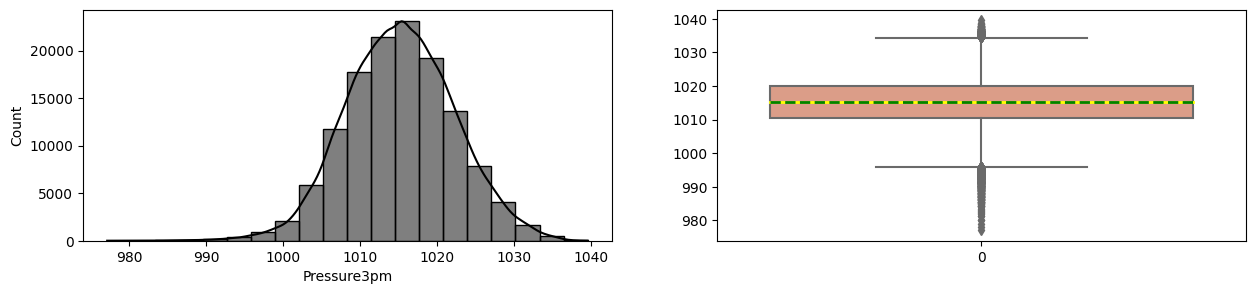

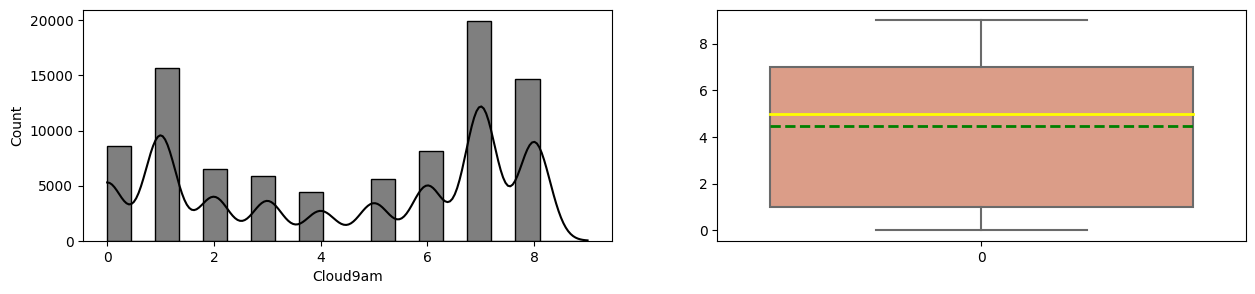

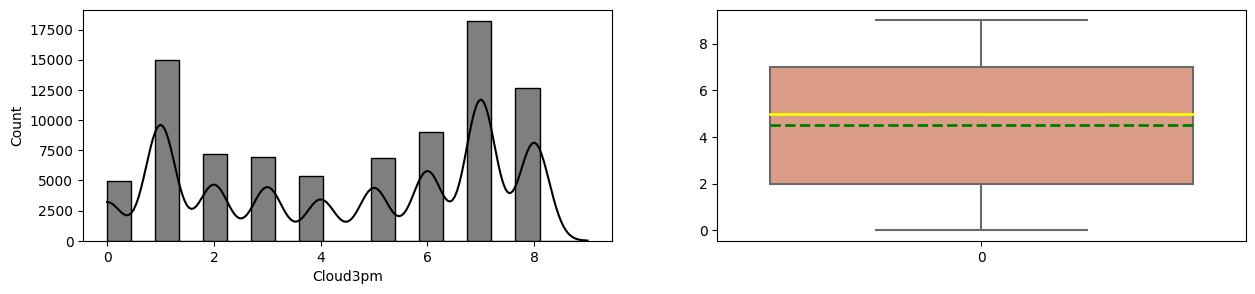

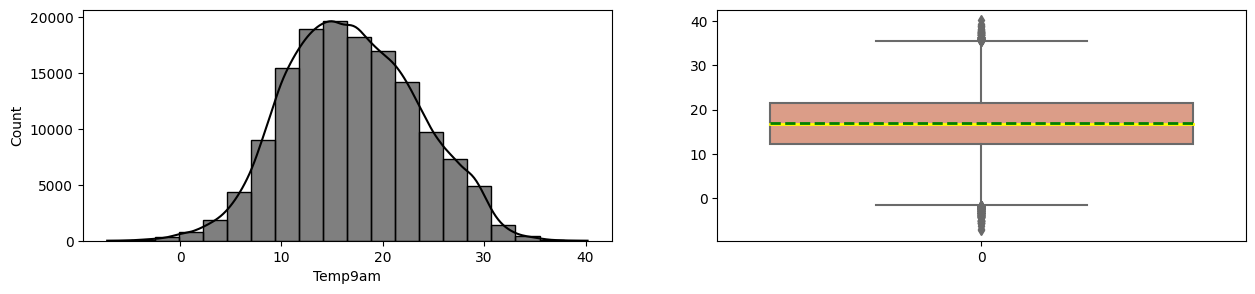

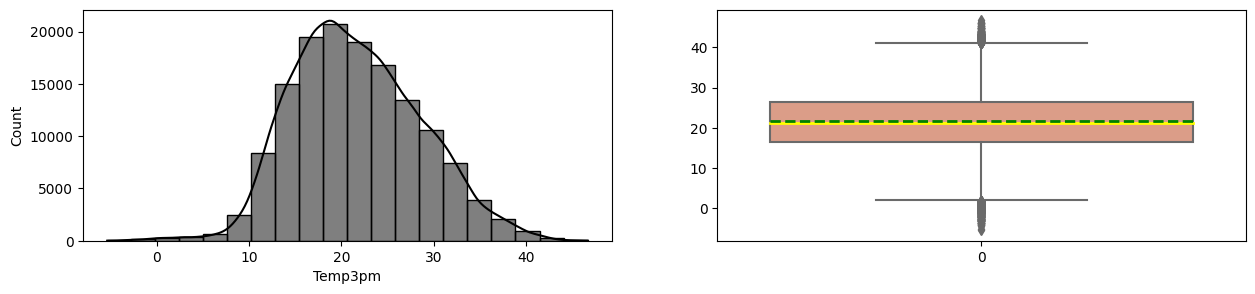

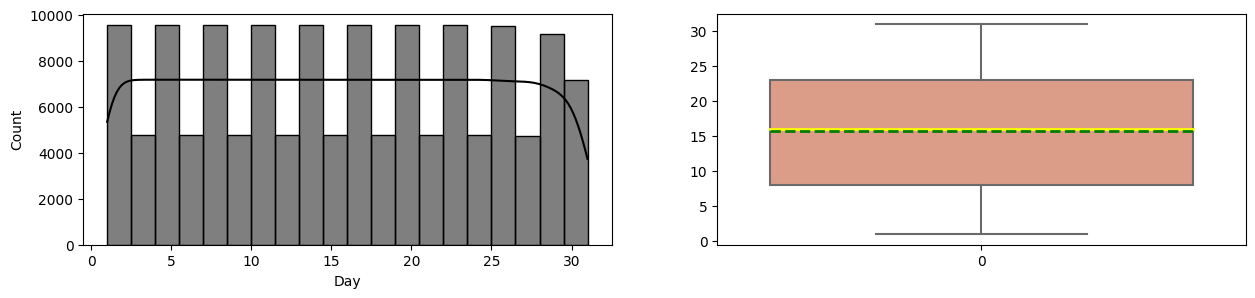

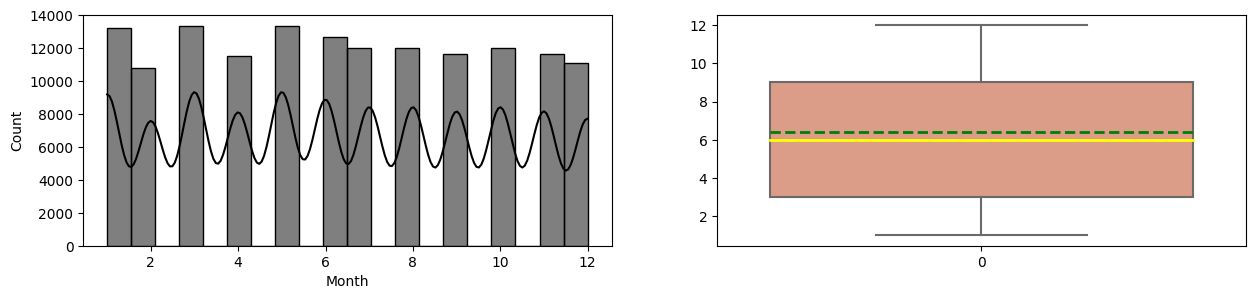

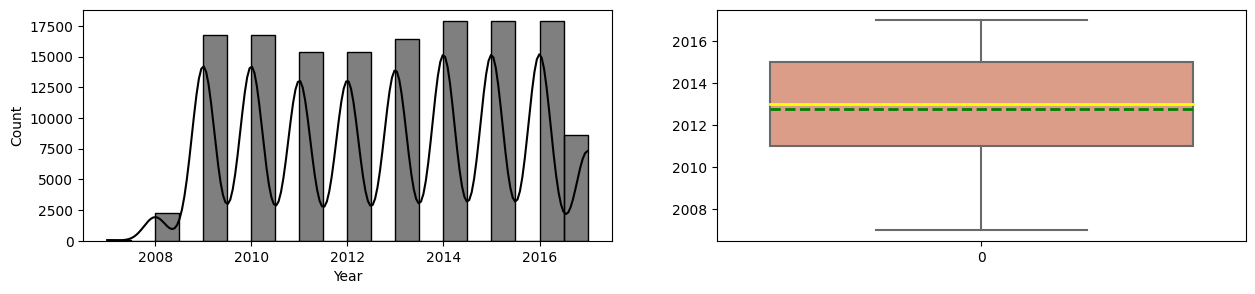

In [ ]:
for i in numerical:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(df[i],bins=20, kde=True,ax=axs[0], color = 'black');
    sns.boxplot(df[i], ax = axs[1], color='darksalmon',
          showmeans = True,
          meanline = True,
          medianprops = {'linewidth':2, 'color':'yellow'},
          meanprops = {'linewidth':2, 'color':'green'})

In [ ]:
# Replace missing categorical variables with Median
df['MinTemp'].fillna(df['MinTemp'].median(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].median(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)

Missing value pada data numerical diisi dengan nilai median karena nilai median cocok untuk menangani outlier, data yang memiliki kemencengan serta median tidak mengubah distribusi dari suatu kolom

In [ ]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64

### Power Transform Data

In [ ]:
df.groupby('RainToday').count()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Day,Month,Year
RainToday,,,,,,,,,,,,,,,,,,,,,,,,
No,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580,113580
Yes,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880,31880


In [ ]:
df.groupby('RainTomorrow').count()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
RainTomorrow,,,,,,,,,,,,,,,,,,,,,,,,
No,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583,113583
Yes,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877,31877


Secara garis besar data yang kita punya menyatakan bahwa besok tidak akan hujan, dengan jumlah "No" jauh lebih besar dari pada "Yes". Data tersebut dikatakan kurang bagus untuk dilakukan modeling. Maka dari itu, perlu dilakukan penormalan pada data agar kemiringannya distribusi datanya simetris.

In [ ]:
pt = PowerTransformer(method='yeo-johnson')

In [ ]:
  X = df[numerical]
  X_transformed = pt.fit_transform(X)

### Checking outliers in numerical columns

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


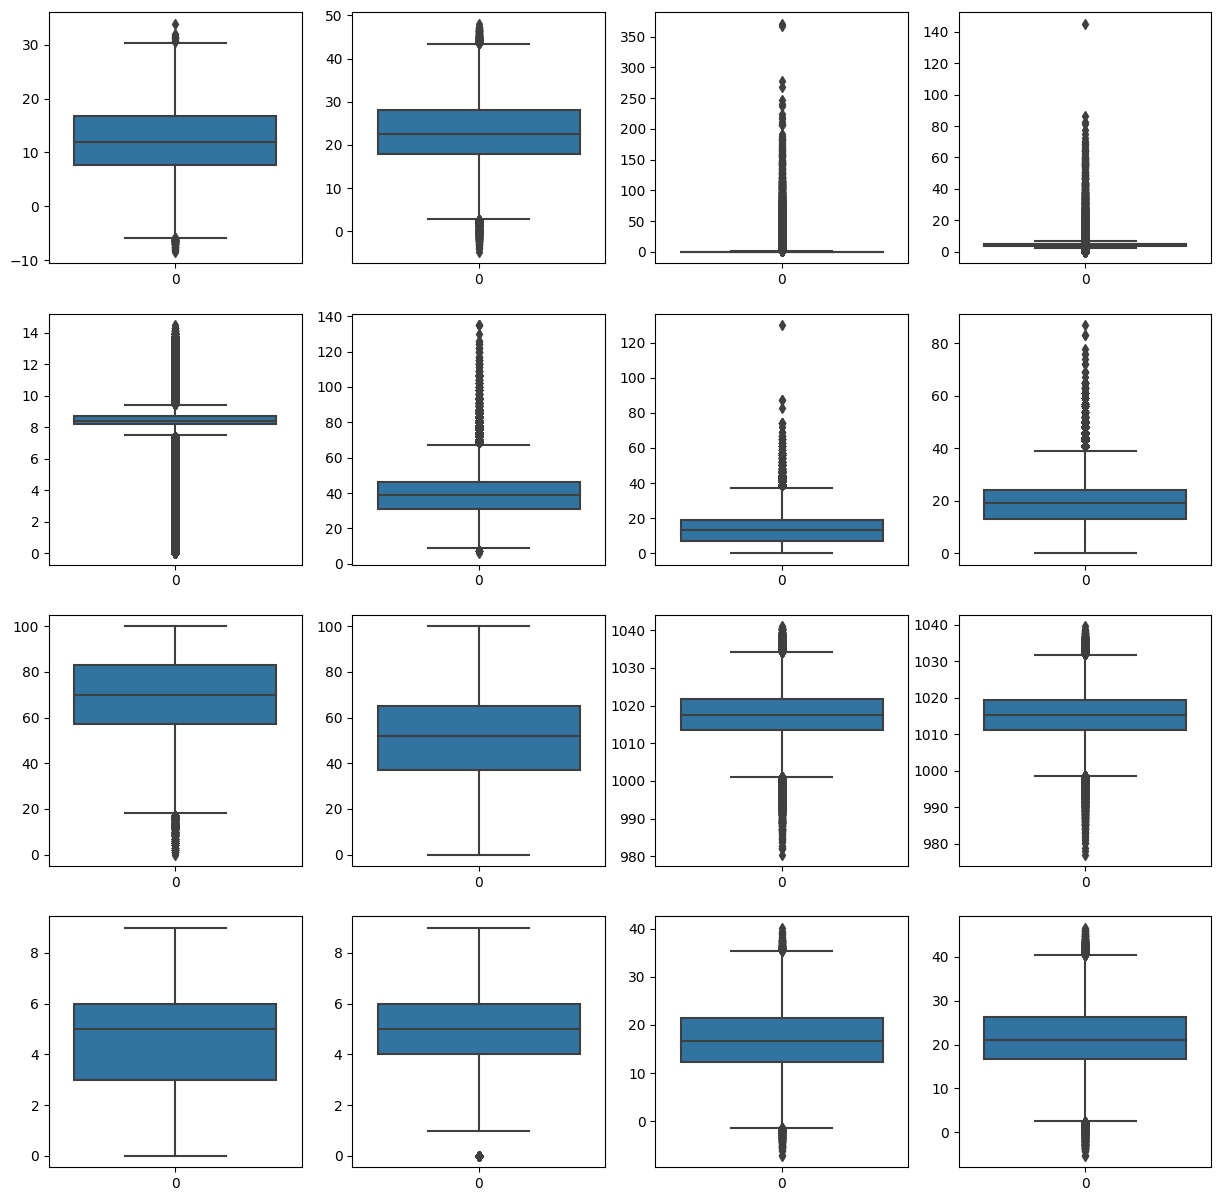

In [ ]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

### Handling Outliers 

In [ ]:
numerical = df._get_numeric_data().columns
categorical = set(df.columns) - set(numerical)

lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = df[numerical[i]].quantile(0.25)
        q3 = df[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        df.loc[(df[numerical[i]] <= minimum), numerical[i]] = minimum
        df.loc[(df[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(numerical)

### Checking outliers

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year'],
      dtype='object')


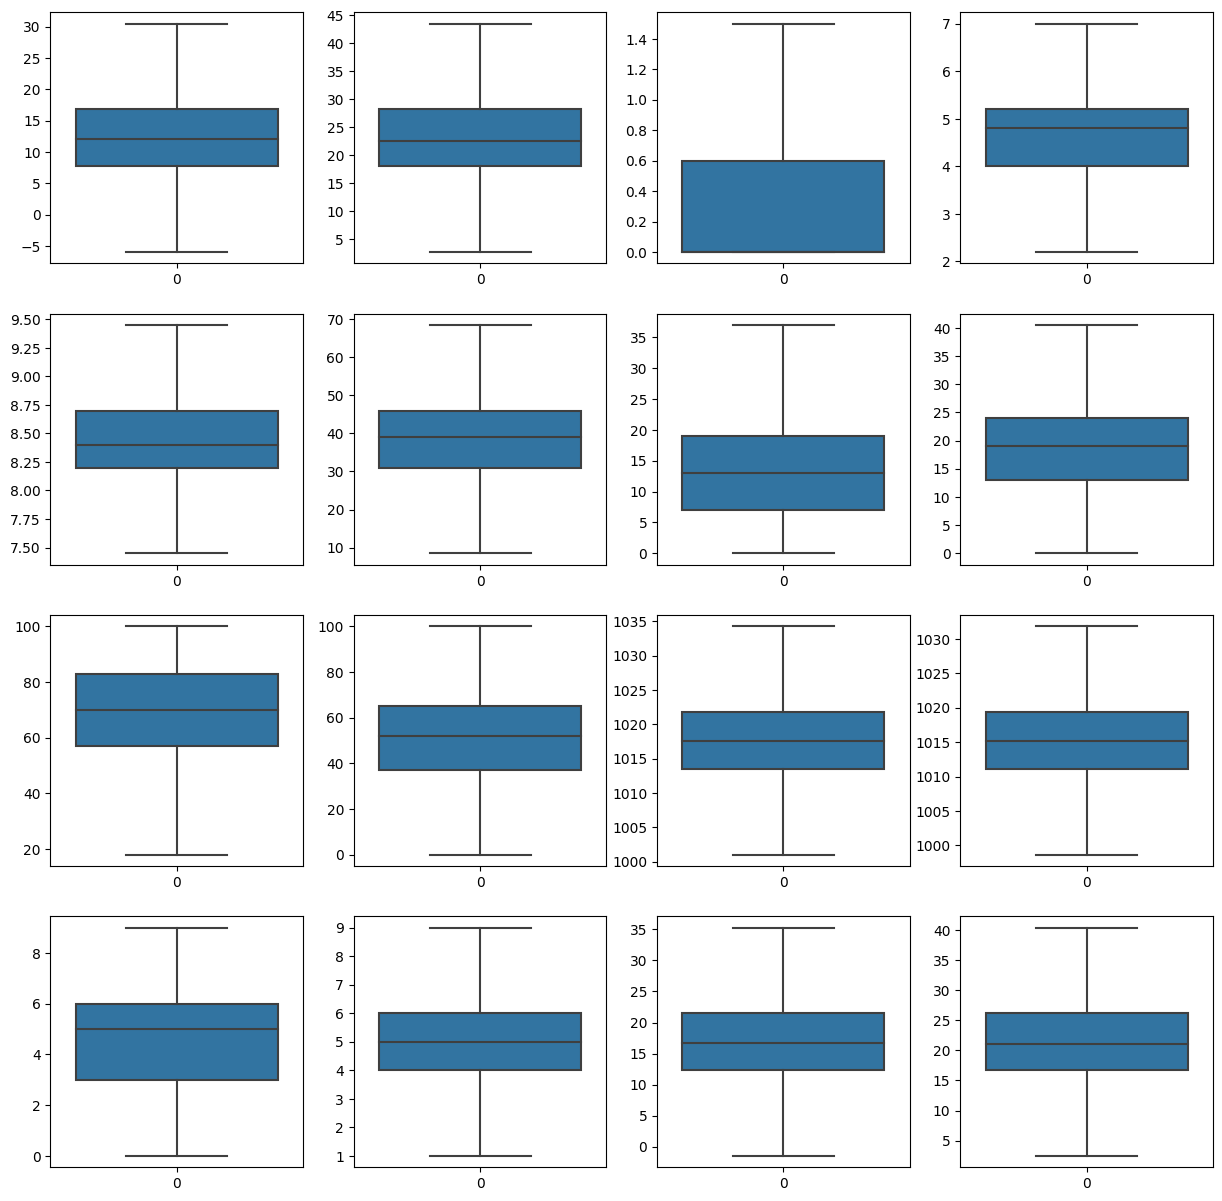

In [ ]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

## EDA & Visualization

### RainTomorrow Percentage

In [ ]:
df['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

Text(0.5, 1.15, 'Rain Tomorrow Percentage')

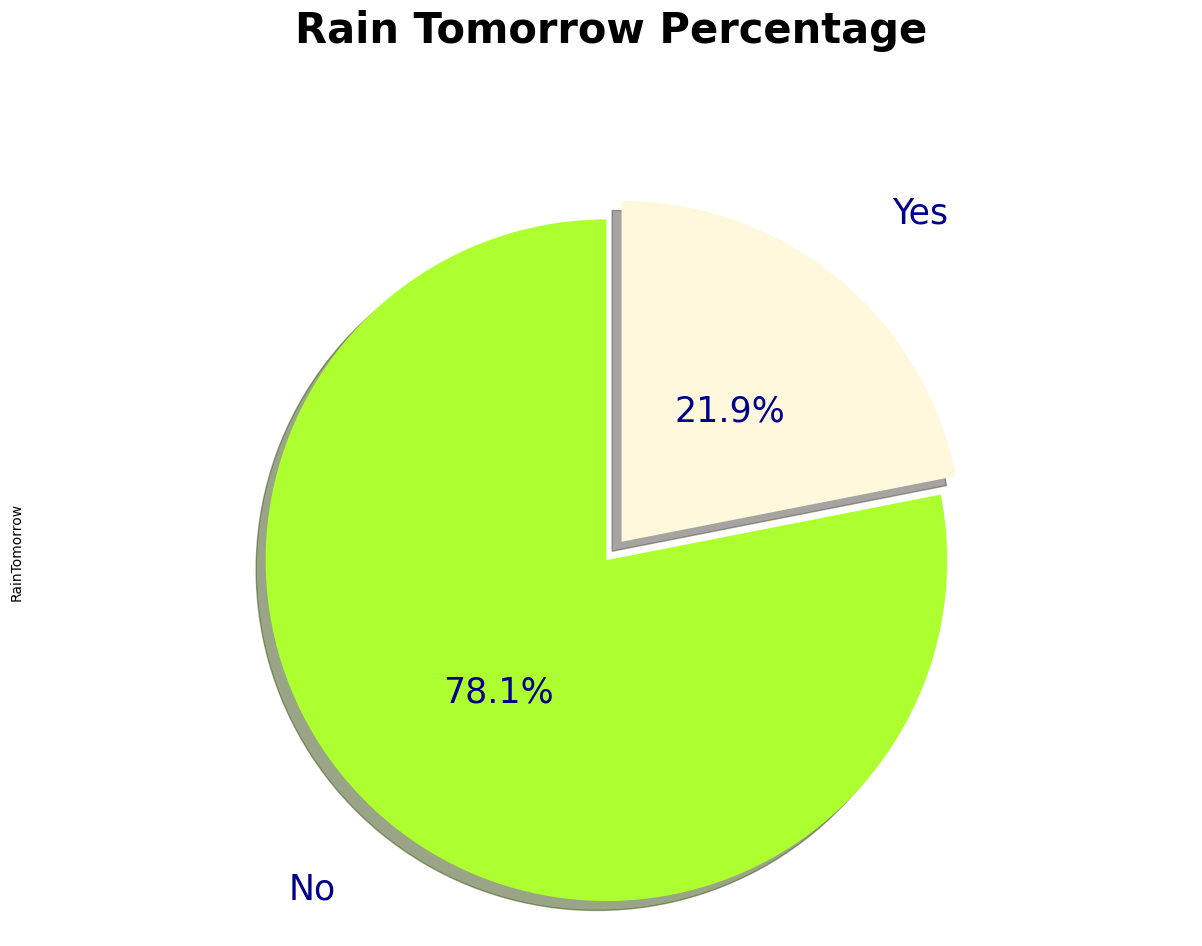

In [ ]:
lable=['No', 'Yes']
explode_list = [0.02, 0.05]

ax = plt.axes()
ax.set_facecolor("lightblue")

df['RainTomorrow'].value_counts().plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=True,
    pctdistance=0.5,
    labels = lable,
    labeldistance = 1.25,
    colors = ['greenyellow', 'cornsilk'],
    textprops={'fontsize': 25,'color':'darkblue'},
    explode=explode_list)
    
plt.axis('equal')
plt.title("Rain Tomorrow Percentage", y=1.15, weight='bold',size='30')

Persentase kemungkinan besok akan hujan atau tidak dari data yang kita punya, menyatakan bahwa kemungkinan tidak lebih besar dari pada kemungkinan iya besok akan hujan.

### RainTomorrow Based on Each Location

In [ ]:
yes=pd.DataFrame(df[df['RainTomorrow']=='Yes'].groupby(['Location'])['Location'].count())
yes.rename(columns={'Location':'Yes'}, inplace=True)
no=pd.DataFrame(df[df['RainTomorrow']=='No'].groupby(['Location'])['Location'].count())
no.rename(columns={'Location':'No'}, inplace=True)
Location=pd.concat([yes,no], axis=1)
Location

,Yes,No
Location,,
Adelaide,688,2505
Albany,902,2138
Albury,618,2422
AliceSprings,244,2796
BadgerysCreek,583,2426
Ballarat,781,2259
Bendigo,562,2478
Brisbane,709,2484
Cairns,950,2090


Text(0.5, 1.0, 'RainTomorrow Based on Location')

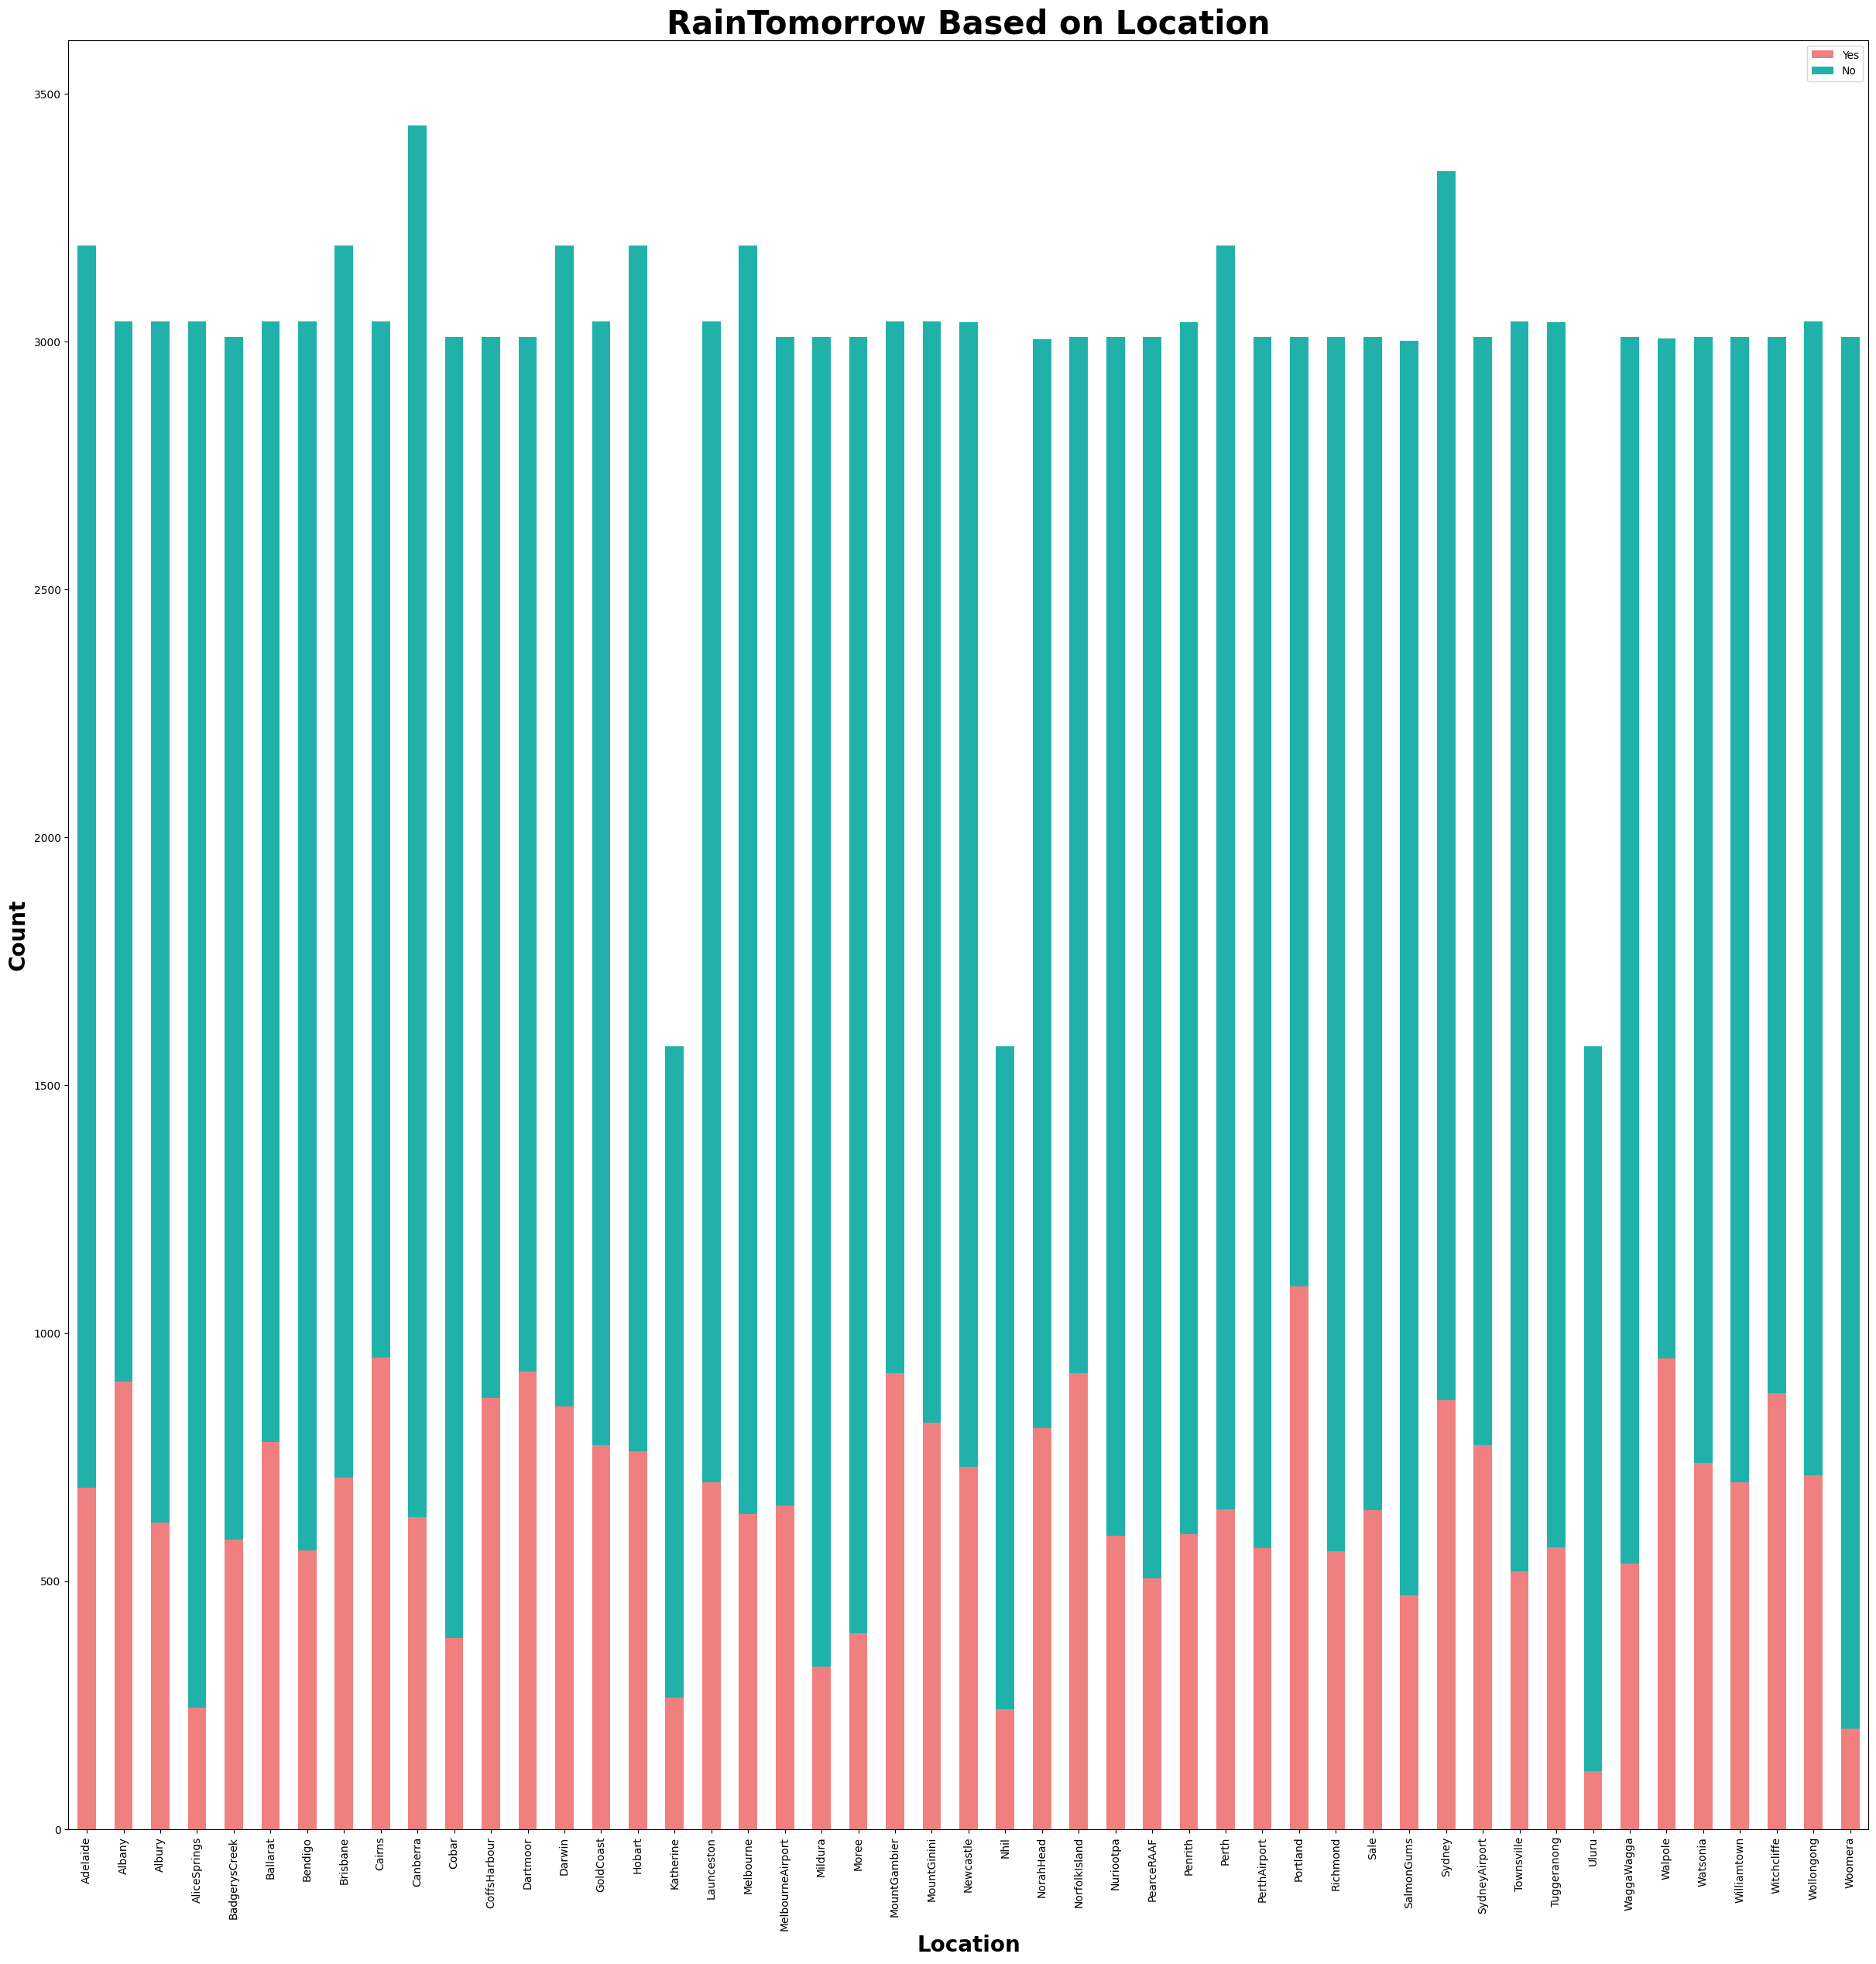

In [ ]:
Location.plot(kind='bar',stacked=True, color=['lightcoral', 'lightseagreen'], figsize=(30, 30))
plt.xlabel('Location', fontsize=20,  weight='bold')
plt.ylabel('Count', fontsize=20, weight='bold')
plt.title("RainTomorrow Based on Location", size=30, weight='bold')

Berdasarkan visualisasi di atas, dapat diketahui bahwa dari berbagai lokasi di Australia, kemungkinan besar besok tidak hujan. Adapun kemungkinan tertinggi bahwa besok tidak hujan ada di daerah Canberra, sedangkan kemungkinan tertinggi bahwa besok akan hujan  ada di daerah Portland

### RainTomorrow Based on RainToday

In [ ]:
df['RainToday'].value_counts()

No     113580
Yes     31880
Name: RainToday, dtype: int64

In [ ]:
X = pd.crosstab(df['RainTomorrow'],df['RainToday'])
X

RainToday,No,Yes
RainTomorrow,,
No,96300,17283
Yes,17280,14597


In [ ]:
Y = X/(X.sum().values)*100
Y

RainToday,No,Yes
RainTomorrow,,
No,84.786054,54.212673
Yes,15.213946,45.787327


Berdasarkan tabel diatas, dapat diketahui bahwa:

- Jika hari ini tidak hujan, maka kemungkinan besok tidak hujan adalah sebesar 15.21%
- Jika hari ini hujan, maka kemungkinan besok akan hujan adalah sebesar 45.78%



### RainTomorrow Based on Rainfall

In [ ]:
Rainfall = df.groupby(["RainTomorrow"]).Rainfall.agg(["mean"])
Rainfall

,mean
RainTomorrow,
No,0.277414
Yes,0.753170


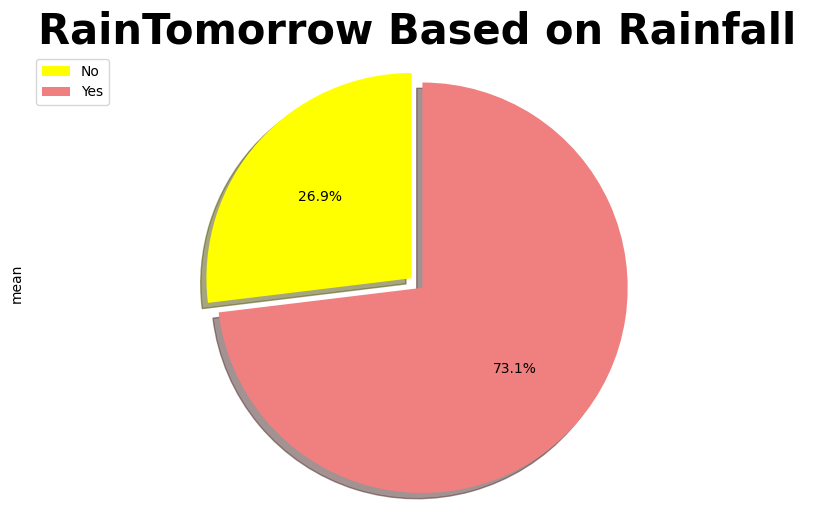

In [ ]:
color_list = ["yellow", "lightcoral"]
explode_list = [0.02, 0.05]

Rainfall['mean'].plot(
    kind='pie'
    ,figsize=(10,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=None
    ,explode=explode_list
    ,colors=color_list
)

plt.title('RainTomorrow Based on Rainfall', fontsize=30, weight='bold')
plt.axis('equal')
plt.legend(labels=Rainfall['mean'].index, loc='upper left') 


Berdasarkan visualisasi diatas, dapat diprediksi bahwa besok tidak akan hujan jika curah hujan memiliki rata-rata nilai 0.277414 mm dengan proporsi 26.9%. Sedangkan besok akan hujan jika curah hujan memiliki rata-rata nilai sekitar 0.753170 mm dengan proporsi 73.1%

### RainTomorrow Over Months Based on Humidity

In [ ]:
Rain_humadity = df.groupby(["RainTomorrow","Month"])["Humidity9am", "Humidity3pm"].agg(["mean"])
Rain_humadity

Humidity9am Humidity3pm
                          mean        mean
RainTomorrow Month                        
No           1       59.665766   42.148631
             2       64.297228   44.132425
             3       68.648204   45.868526
             4       68.564103   47.709035
             5       72.898194   50.834038
             6       77.492373   55.139089
             7       75.424893   52.715722
             8       68.682270   47.633252
             9       62.737326   46.128293
             10      60.620601   43.599197
             11      59.169609   43.418932
             12      59.176750   43.239738
Yes          1       74.925540   65.827862
             2       78.023108   68.324422
             3       79.051420   67.683567
             4       79.001624   68.821356
             5       80.542333   70.130908
             6       84.245376   75.183107
             7       82.742668   72.187323
             8       79.735354   68.513805
             9       73.278204   65.136992
             10      72.634199   64.117316
             11      72.910509   65.370279
             12      72.154222   64.149778

Berdasarkan tabel di atas, dapat diketahui bahwa rata-rata humiditas perbulannya pada pukul 3 sore mengalami penurunan dari humiditas pada pukul 9 pagi. 

Dapat diprediksi bahwa besok akan hujan jika rata-rata humiditas pada pukul 3 sore sebesar 60% keaatas. Sedangkan besok tidak akan hujan jika rata-rata humiditas pada pukul 3 sore dibawah 60% 

### RainTomorrow Over Months 

In [ ]:
Rain_Months = pd.DataFrame(df[(df['RainTomorrow']=="Yes")].groupby('Month').count()['RainTomorrow'])
                           
Rain_Months

,RainTomorrow
Month,
1,2498
2,2207
3,2781
4,2463
5,2941
6,3244
7,3171
8,2970
9,2606


(-1.0999999764610038,
 1.0999999829976181,
 -1.099999989571316,
 1.099999999503396)

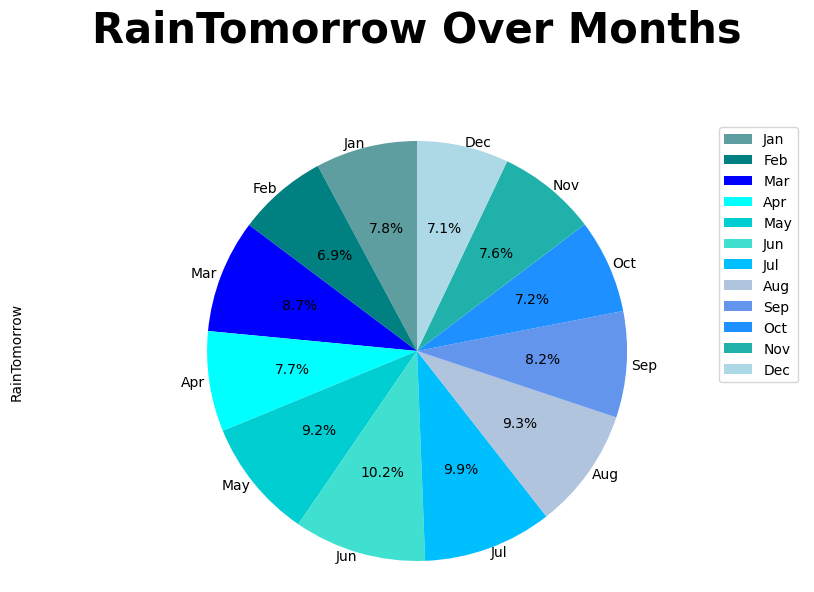

In [ ]:
Rain_Months.plot(
    kind='pie'
    ,figsize=(10,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=False
    ,labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ,labeldistance = 1.02
    ,subplots=True
    ,colors= ['cadetblue', 'teal', 'blue', 'cyan', 'darkturquoise','turquoise', 'deepskyblue','lightsteelblue','cornflowerblue','dodgerblue', 'lightseagreen','lightblue']
)

plt.title('RainTomorrow Over Months', fontsize=30, weight='bold', y=1.15)
plt.axis('equal')

Berdasarkan visualisasi di atas, dapat diketahui bahwa dari bulan Januari sampai Desember kemungkinan tertinggi hujan akan turun esok hari hanya sebesar 10.2%. Adapun bulan Februari merupakan bulan yang memiliki persentase terendah terhadap kemungkinan turun hujan pada esok hari. sedangkan, bulan Juni merupakan bulan yang memiliki persentase tertinggi terhadap kemungkinan turun hujan pada esok hari

### RainTomorrow Over Years 

In [ ]:
Rain_Years=pd.DataFrame(df[(df['RainTomorrow']=="Yes")].groupby('Year').count()['RainTomorrow'])
Rain_Years

,RainTomorrow
Year,
2007,19
2008,511
2009,3607
2010,3997
2011,3738
2012,3389
2013,3465
2014,3557
2015,3648


(-1.0999999859848373,
 1.0999999830636253,
 -1.1049998149948814,
 1.204999807525687)

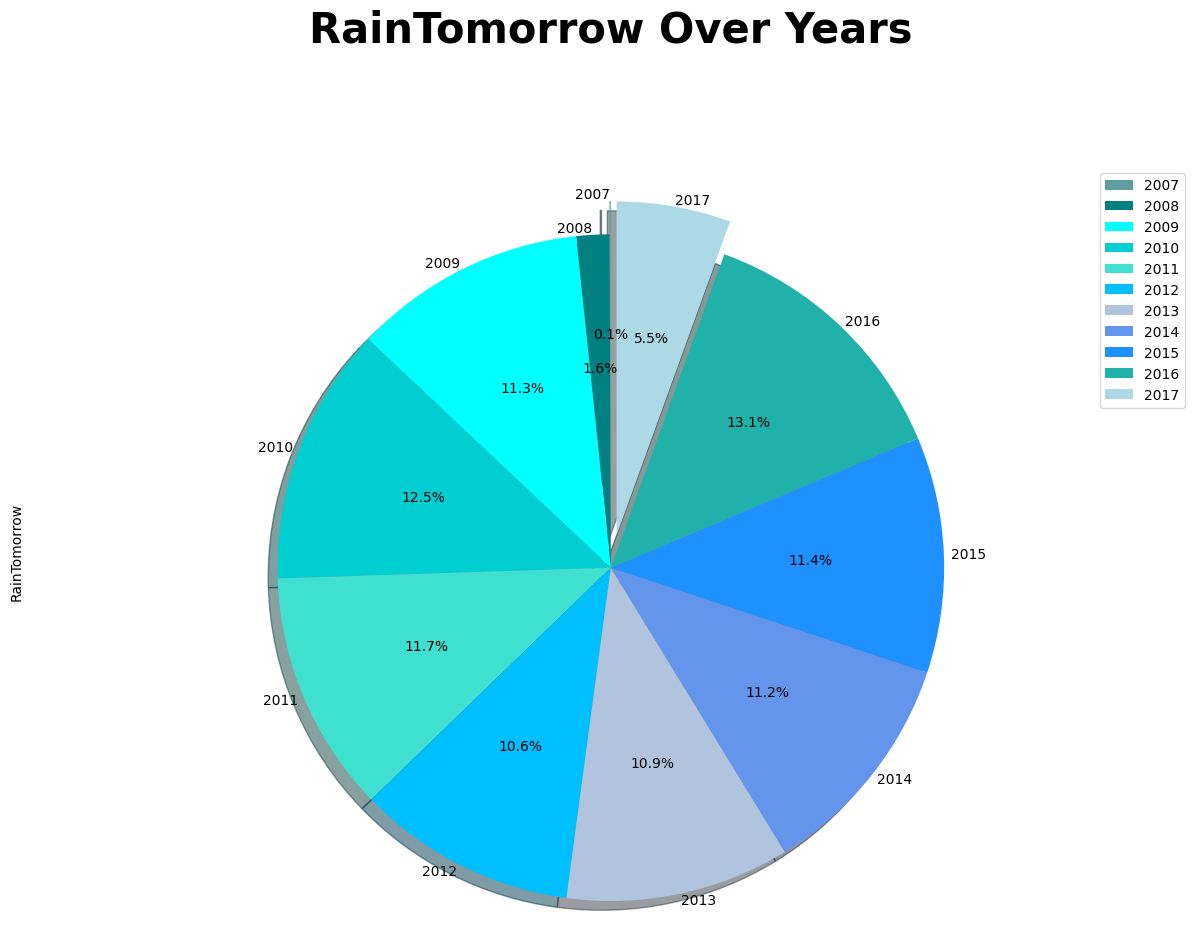

In [ ]:
explode_list = [0.1,0,0,0,0,0,0,0,0,0,0.1]
Rain_Years.plot(
    kind='pie'
    ,figsize=(15,10)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
    ,labeldistance = 1.02
    ,subplots=True
    ,colors= ['cadetblue', 'teal', 'cyan', 'darkturquoise','turquoise', 'deepskyblue','lightsteelblue','cornflowerblue','dodgerblue', 'lightseagreen','lightblue']
    ,explode=explode_list
)

plt.title('RainTomorrow Over Years', fontsize=30, weight='bold', y=1.15)
plt.axis('equal')

Berdasarkan visualisasi di atas, dapat diketahui bahwa dari tahun 2007 sampai tahun 2017 kemungkinan tertinggi hujan akan turun esok hari sebesar 13.1%. Adapun tahun 2007 merupakan tahun yang memiliki persentase terendah terhadap kemungkinan turun hujan di hari esok. Sedangkan tahun 2016 merupakan tahun yang memiliki persentase tertinggi terhadap kemungkinan turun hujan pada esok hari




### Correlation

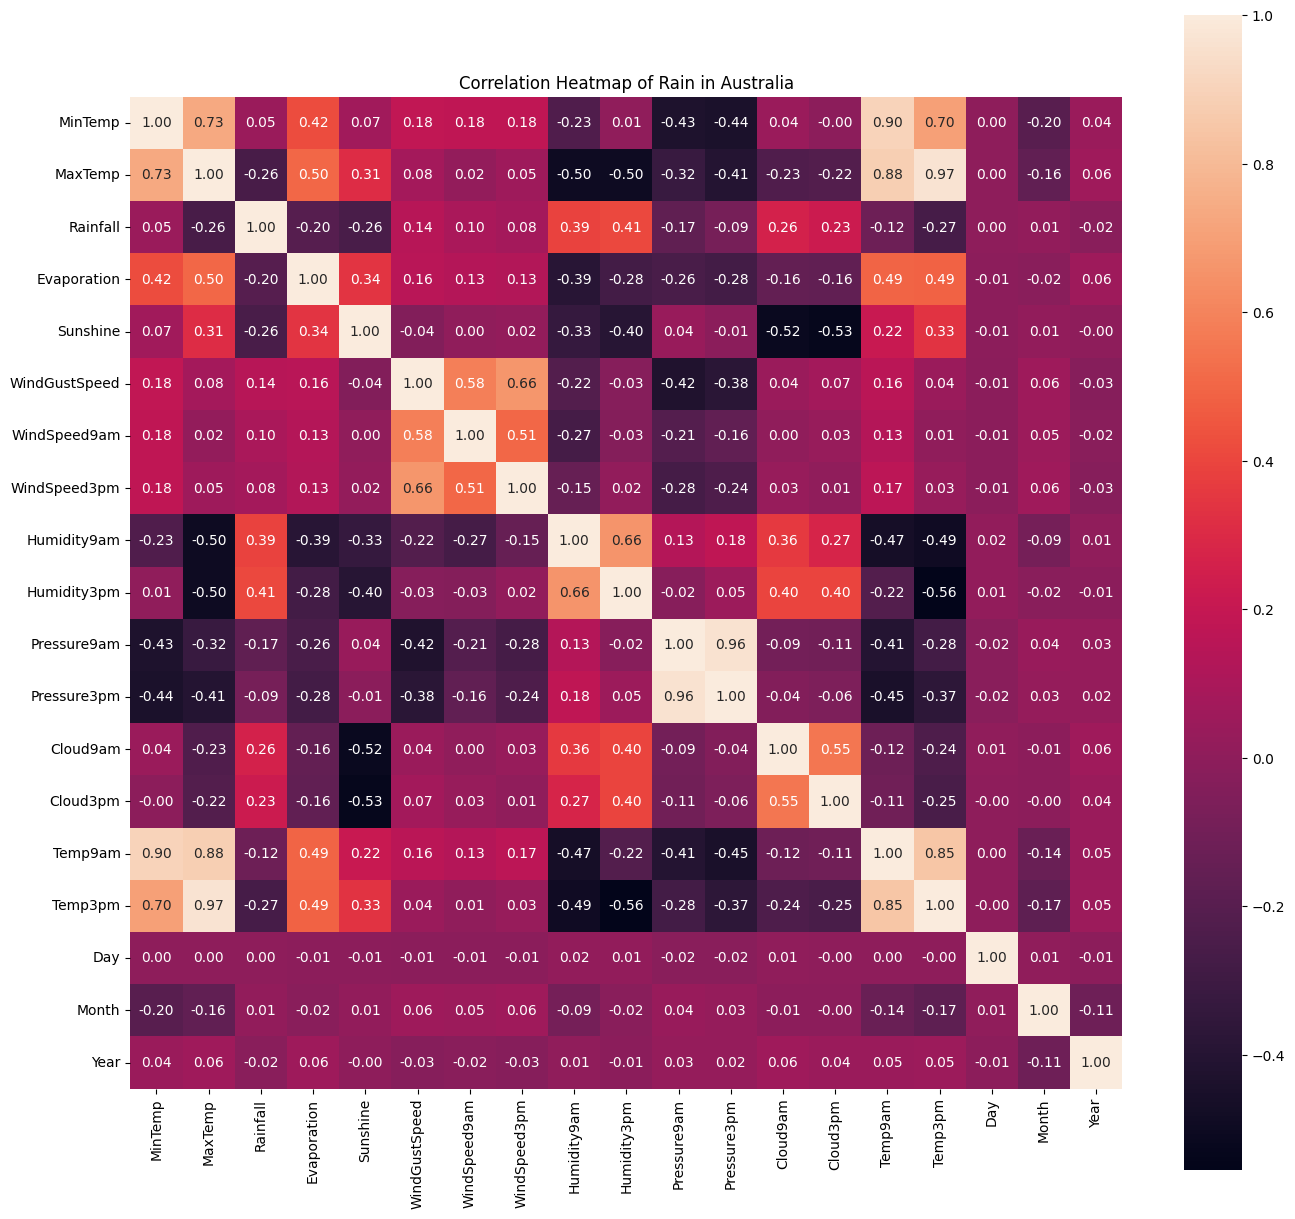

In [ ]:
plt.figure(figsize=(16,15))
plt.title('Correlation Heatmap of Rain in Australia')
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels())           
plt.show()

Berdasarkan Heatmap di atas, dapat diketahui:
- MinTemp dan MaxTemp memiliki nilai korelasi yang tinggi yaitu sebesar 0.73. Oleh karena itu, untuk menghindari multikolinearitas, kami hanya menggunakan MaxTemp
- WindGustSpeed, WindSpeed9am, dan WindSpeed3pm memiliki  nilai korelasi tinggi, sehingga yang akan digunakan hanya WindGustSpeed
- Humidity9am  dan Humidity3pm memiliki nilai yang korelasi tinggi yaitu sebesar 0.66, sehingga yang akan digunakan adalah Humidity3pm
- Pressure9am dan Pressure3pm memiliki nilai yang korelasi tinggi yaitu sebesar 0.96, sehingga yang akan digunakan hanya Pressure3pm
- Cloud9am dan Cloud3pm memiliki nilai yang korelasi tinggi yaitu sebesar 0.55,  sehingga yang akan digunakan hanya Cloud3pm
- Temp9am dengan Temp3pm  memiliki nilai yang korelasi tinggi yaitu sebesar  0.85,  sehingga yang akan digunakan hanya Temp3pm

## Data Preprocessing

In [ ]:
df= df.drop(['MinTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'Temp9am'], axis=1)
df.head()

,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,22.9,0.6,4.8,8.4,W,44.0,W,WNW,22.0,1007.1,5.0,21.8,No,No,1.0,12,2008
1,Albury,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,25.0,1007.8,5.0,24.3,No,No,2.0,12,2008
2,Albury,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,30.0,1008.7,2.0,23.2,No,No,3.0,12,2008
3,Albury,28.0,0.0,4.8,8.4,NE,24.0,SE,E,16.0,1012.8,5.0,26.5,No,No,4.0,12,2008
4,Albury,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,33.0,1006.0,8.0,29.7,No,No,5.0,12,2008


### Replace category column with encode label

In [ ]:
le = LabelEncoder()
df.RainToday = le.fit_transform(df.RainToday)
df.RainTomorrow= le.fit_transform(df.RainTomorrow)

Melakukan encoding dengan Label Encoder pada atribut yang memiliki 2 kategori label.

In [ ]:
def one_hot_encoder(df,feature,keep_first=True):
    one_hot_cols = pd.get_dummies(df[feature])
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_df = pd.concat([df,one_hot_cols],axis=1)
    new_df.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_df=new_df.iloc[:,1:]
    
    return new_df

df_copy = df.copy()
for col in df_copy.select_dtypes(include='O').columns:
    df_copy=one_hot_encoder(df_copy,col)

df_copy.head()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,22.9,0.6,4.8,8.4,44.0,22.0,1007.1,5.0,21.8,0,0,1.0,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,25.1,0.0,4.8,8.4,44.0,25.0,1007.8,5.0,24.3,0,0,2.0,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,25.7,0.0,4.8,8.4,46.0,30.0,1008.7,2.0,23.2,0,0,3.0,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,28.0,0.0,4.8,8.4,24.0,16.0,1012.8,5.0,26.5,0,0,4.0,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,32.3,1.0,4.8,8.4,41.0,33.0,1006.0,8.0,29.7,0,0,5.0,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Melakukan encoding dengan One Hot Encoder pada atribut yang memiliki lebih dari 2 kategori label.

### Feature Selection

In [ ]:
x = df_copy.drop(['RainTomorrow'], axis=1)
y = df_copy['RainTomorrow']

print(x.shape)
print(y.shape)

(145460, 110)
(145460,)


In [ ]:
# Apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=f_classif, k=10)
x_new = bestfeatures.fit_transform(x, y)
names = x.columns.values[bestfeatures.get_support()]
scores = bestfeatures.scores_[bestfeatures.get_support()]
names_scores = list(zip(names, scores))
df_column = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
df_column

,Feat_names,F_Scores
0,MaxTemp,3643.089293
1,Rainfall,16984.689630
2,Evaporation,1424.580596
3,Sunshine,13178.288044
4,WindGustSpeed,7129.963540
5,Humidity3pm,33596.712523
6,Pressure3pm,6669.103493
7,Cloud3pm,13554.640102
8,Temp3pm,5310.357821
9,RainToday,14999.484212


Setelah mendapatkan fitur-fitur yang memiliki dampak paling signifikan pada model, dilakukan inisiasi akhir pada variabel X sebagai data training.

Dalam konteks ini, dipilih 10 atribut yang memiliki pengaruh yang signifikan berdasarkan hasil kedua uji pemilihan fitur yang telah dilakukan. Atribut-atribut tersebut yaitu Rainfall, RainToday, Sunshine, Evaporation, MaxTemp,  Humidity3pm, Cloud3pm, Pressure3pm, WindGustSpeed, dan Temp3pm.

In [ ]:
X_fit = df[['Rainfall','RainToday', 'Sunshine','Evaporation', 'MaxTemp', 'Humidity3pm','Cloud3pm', 'Pressure3pm','WindGustSpeed', 'Temp3pm']]


### Data Splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2, random_state=0, stratify=y)

### Transforming Data for Modelling

In [ ]:
pt = PowerTransformer(method='yeo-johnson')

X_train_transformed = pt.fit_transform(x_train)
X_test_transformed = pt.transform(x_test)

pd.DataFrame({'cols':x_train.columns , 'yeo-johnson': pt.lambdas_})

,cols,yeo-johnson
0,Rainfall,-3.196879
1,RainToday,-6.173915
2,Sunshine,0.144671
3,Evaporation,1.142428
4,MaxTemp,0.713157
5,Humidity3pm,0.893494
6,Cloud3pm,1.346465
7,Pressure3pm,-0.954388
8,WindGustSpeed,0.461518
9,Temp3pm,0.712066


In [ ]:
X_train_transformed = pd.DataFrame(X_train_transformed ,columns=x_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed ,columns=x_test.columns)

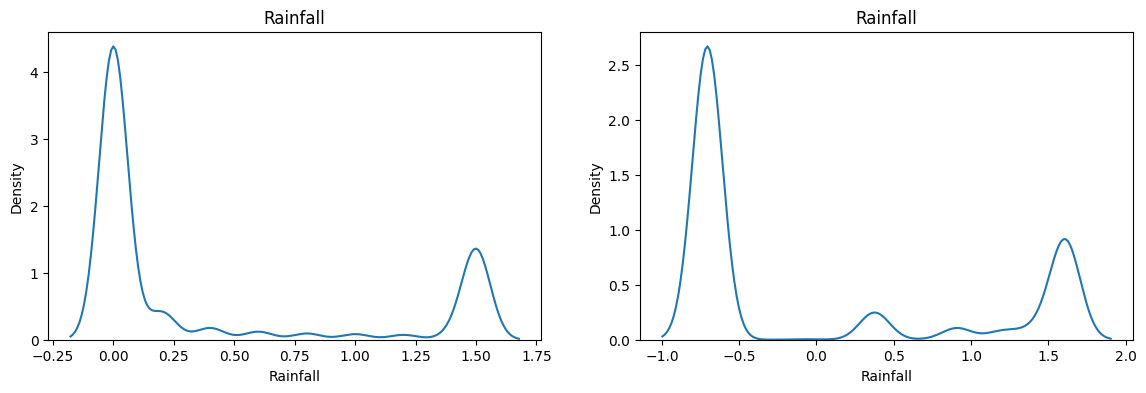

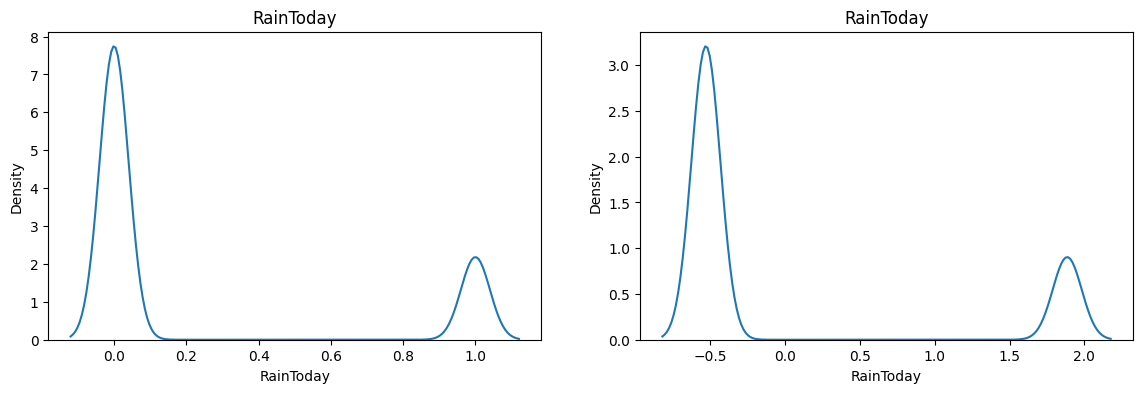

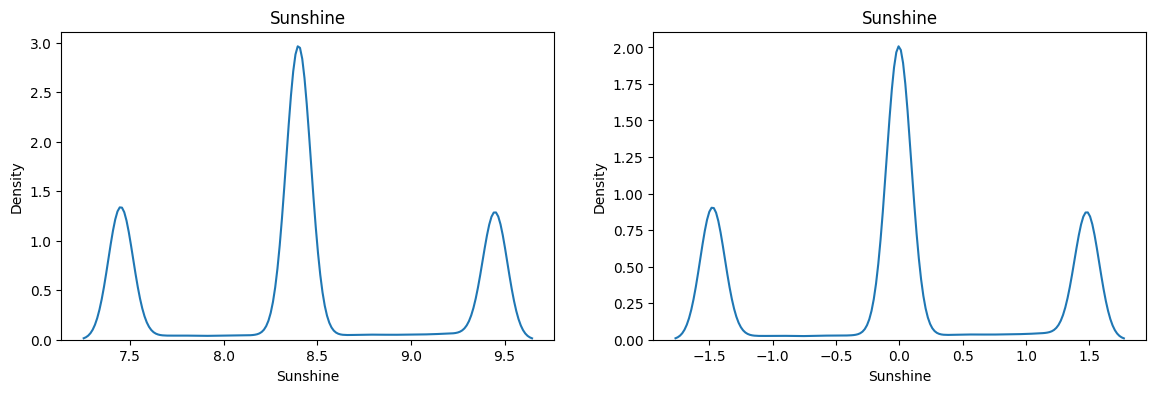

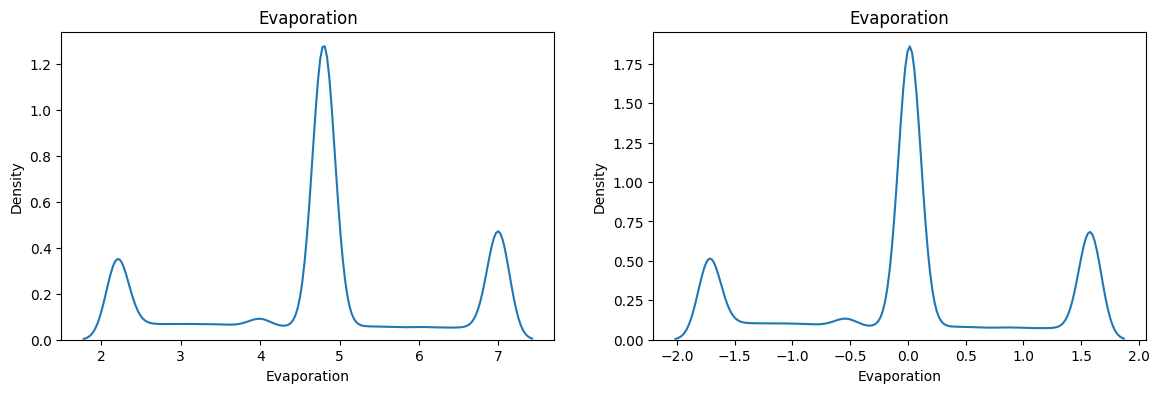

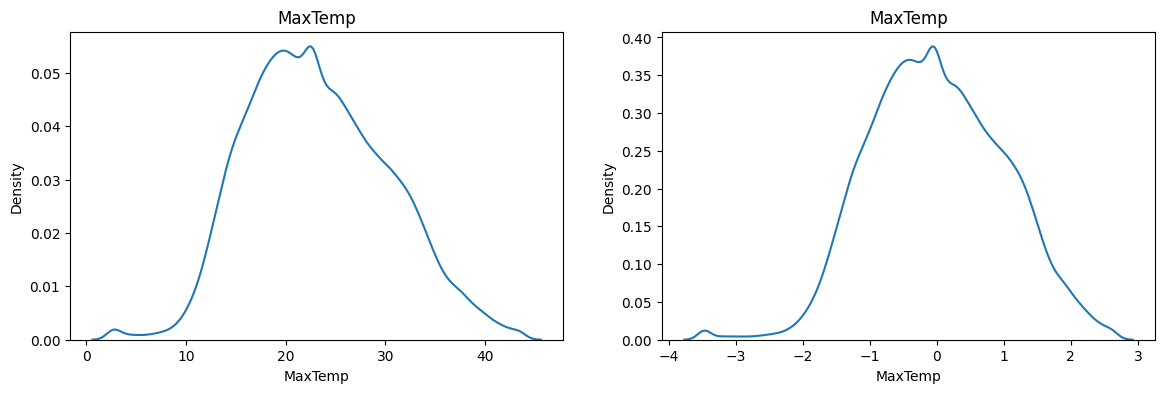

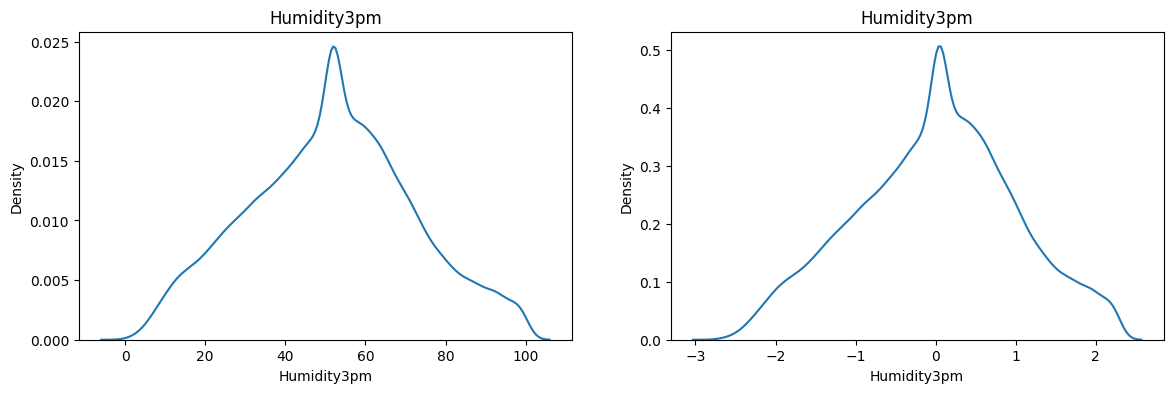

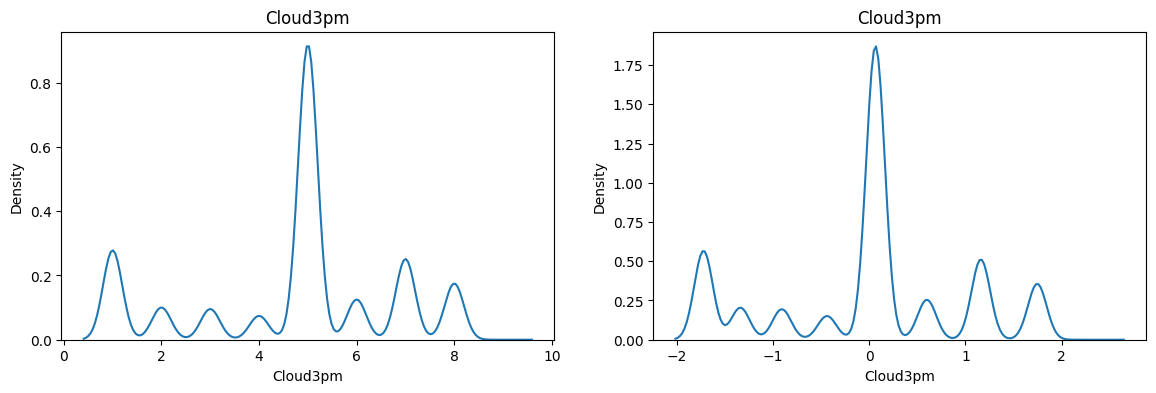

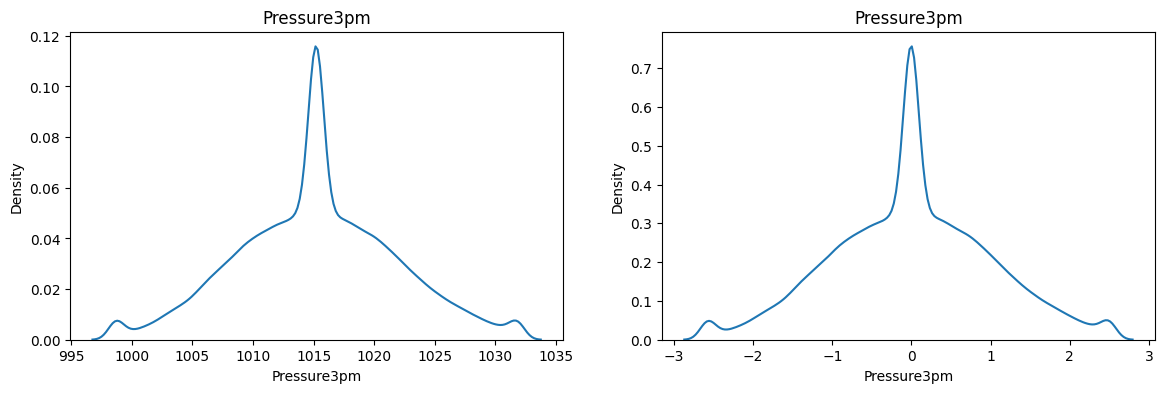

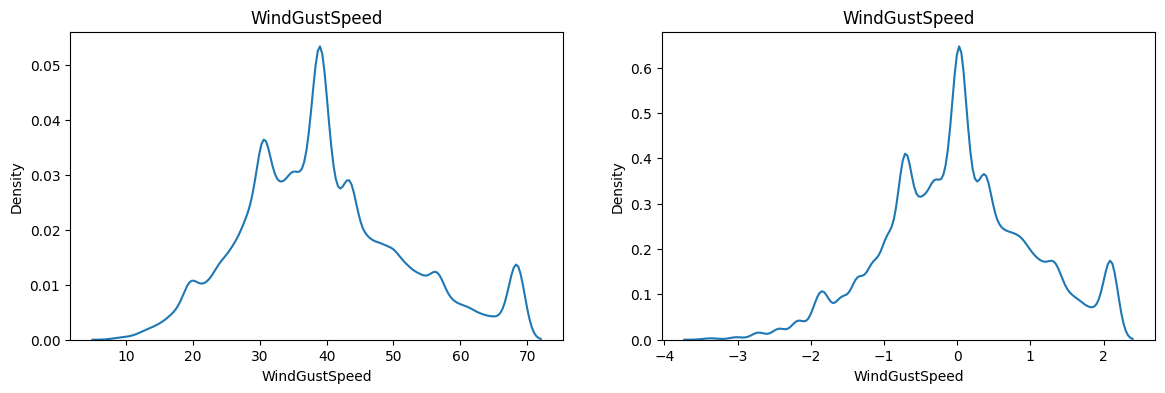

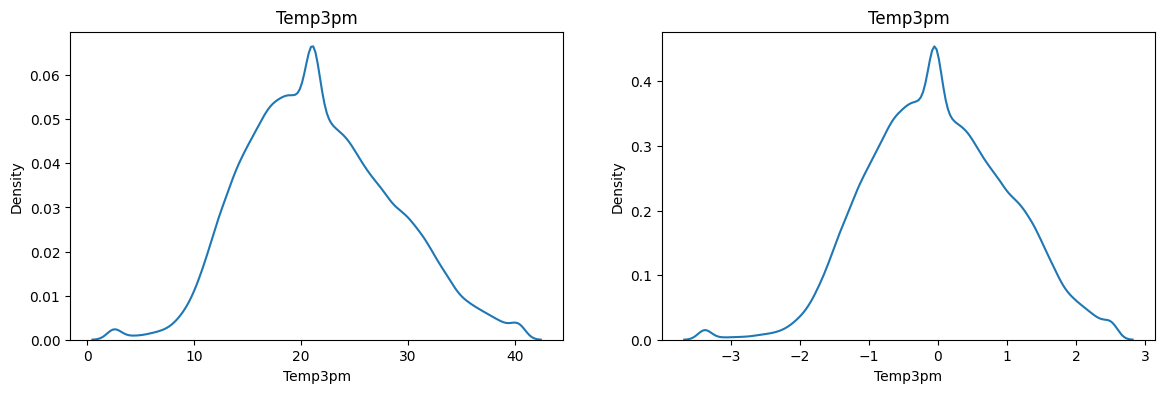

In [ ]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col)
    
    plt.show()

## Modelling

Logistic Regression dan SVM digunakan dalam analisis cuaca Australia karena keduanya adalah model pembelajaran mesin yang biasa digunakan dalam masalah klasifikasi.

### Logistic Regression
Logistic Regression merupakan model statistik yang umum digunakan untuk masalah klasifikasi biner. Dalam konteks analisis cuaca Australia, Logistic Regression dipilih karena:
* Prediksi hujan atau tidak: Tujuan utama analisis cuaca ini adalah memprediksi apakah akan terjadi hujan atau tidak pada hari berikutnya. Logistic Regression cocok untuk masalah ini karena mampu menghasilkan probabilitas prediksi yang berkisar antara 0 dan 1, sehingga kita dapat menetapkan ambang batas tertentu untuk mengklasifikasikan hasil prediksi sebagai "yes" atau "no".
* Kemampuan interpretasi: Salah satu kelebihan Logistic Regression adalah kemampuannya untuk memberikan interpretasi yang mudah dipahami tentang hubungan antara atribut cuaca dengan probabilitas terjadinya hujan besok. Ini membantu kita dalam mengidentifikasi atribut-atribut yang paling berpengaruh dalam membuat prediksi.
* Efisiensi pada dataset dengan banyak fitur: Jika dataset cuaca Australia memiliki banyak atribut cuaca yang relevan, Logistic Regression masih dapat memberikan performa yang baik dalam waktu yang efisien.

#### Model 1

In [ ]:
# Training Model
lr1 = LogisticRegression(C=0.8, class_weight='balanced', solver='liblinear', random_state=0)
lr1.fit(X_train_transformed, y_train)

LogisticRegression(C=0.8, class_weight='balanced', random_state=0,
                   solver='liblinear')

In [ ]:
# Predict Probabilitas
lr1.predict_proba(X_train_transformed)

array([[0.77132046, 0.22867954],
       [0.84283697, 0.15716303],
       [0.754879  , 0.245121  ],
       ...,
       [0.67375258, 0.32624742],
       [0.10964572, 0.89035428],
       [0.41170411, 0.58829589]])

In [ ]:
# Predict Model
y_pred_lr1 = lr1.predict(X_test_transformed)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr1)

print("Skor akurasi model:", accuracy)

Skor akurasi model: 0.7762615151931802


In [ ]:
# Model Evaluation
fpr_lr1, tpr_lr1, thresholds = roc_curve(y_test, y_pred_lr1)
print('ROC AUC Score: {}'.format(auc(fpr_lr1, tpr_lr1)))

ROC AUC Score: 0.7753211303273786


ROC AUC Score adalah metrik evaluasi yang digunakan untuk mengukur kinerja model klasifikasi biner. Skor tersebut menunjukkan sejauh mana model dapat membedakan antara kelas positif dan negatif. Semakin tinggi skor ROC AUC, semakin baik kemampuan model dalam memprediksi kelas yang benar.

Dalam analisis data cuaca Australia menggunakan dataset dari Kaggle, penggunaan metode klasifikasi biner dan evaluasi model menggunakan ROC AUC Score menghasilkan skor 0.7753211303273786.


AUC: 0.7753211303273786


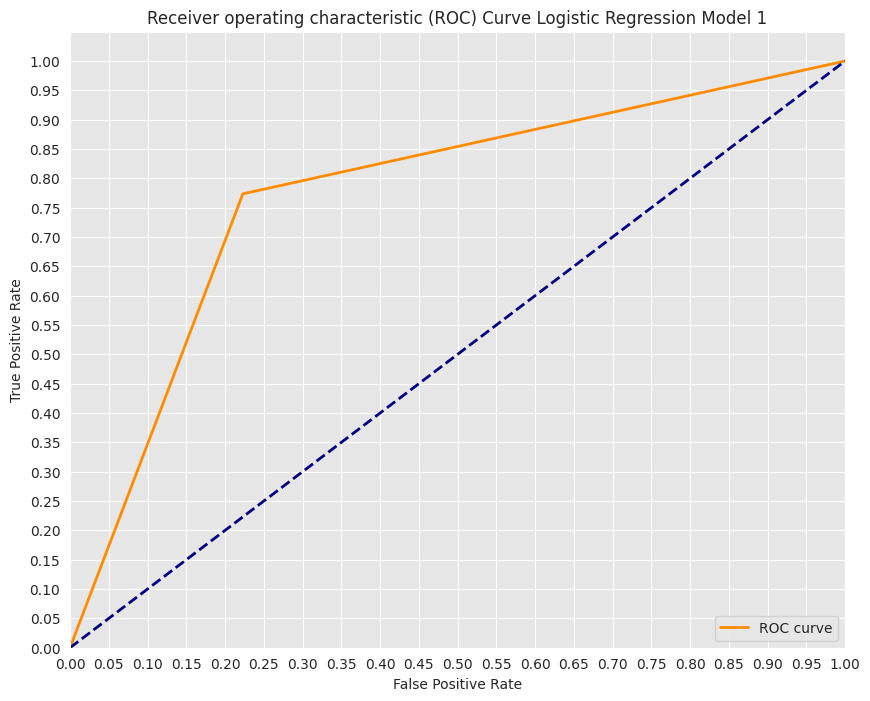

In [ ]:
# ROC Curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr_lr1, tpr_lr1)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_lr1, tpr_lr1, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve Logistic Regression Model 1')
plt.legend(loc='lower right')
plt.show()

Visualisasi kurva ROC Logistic Regression Model 1 di atas, menampilkan True Positive Rate (TPR) sebagai sumbu Y dan False Positive Rate (FPR) sebagai sumbu X. Kurva ROC menggambarkan kemampuan model dalam membedakan antara kelas positif dan negatif, diperoleh nilai AUC sebesar 0.7753211303273786. Kurva ROC digunakan untuk mengukur kinerja model klasifikasi dalam membedakan antara kelas positif dan negatif.

Kurva ROC di atas menunjukkan bahwa model klasifikasi yang telah dibangun memiliki kinerja yang baik dalam memprediksi kelas yang benar pada dataset cuaca Australia yang tidak seimbang. Semakin dekat kurva ROC dengan sudut kiri atas, semakin baik kinerja model. Dengan AUC sebesar 0.7753211303273786, dapat disimpulkan bahwa model memiliki tingkat akurasi yang cukup baik.

#### Model 2

In [ ]:
# Training Model
lr2 = LogisticRegression(random_state=0)
lr2 = LogisticRegression(fit_intercept=True, penalty='l2', random_state=0)
lr2.fit(X_train_transformed, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predict Probabilitas
lr2.predict_proba(X_train_transformed)

array([[0.92499832, 0.07500168],
       [0.95120305, 0.04879695],
       [0.92206391, 0.07793609],
       ...,
       [0.87691243, 0.12308757],
       [0.30080821, 0.69919179],
       [0.71549722, 0.28450278]])

In [ ]:
# Predict Model
y_pred_lr2 = lr2.predict(X_test_transformed)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr2)

print("Skor akurasi model:", accuracy)

Skor akurasi model: 0.8400934964938814


In [ ]:
# Model Evaluation
fpr_lr2, tpr_lr2, thresholds = roc_curve(y_test, y_pred_lr2)
print('ROC AUC Score: {}'.format(auc(fpr_lr2, tpr_lr2)))

ROC AUC Score: 0.7102905917396232


Dalam analisis data cuaca Australia menggunakan dataset dari Kaggle, metode yag digunakan untuk mengevaluasi model adalah ROC AUC Score. Hasil evaluasi menunjukkan ROC AUC Score sebesar 0.7102905917396232.

Dalam kasus ini, skor ROC AUC sebesar 0.7102905917396232 menunjukkan bahwa model klasifikasi memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif pada dataset cuaca Australia yang tidak seimbang. Meskipun skor tersebut sedikit lebih rendah dari nilai sebelumnya, model masih memberikan prediksi yang berguna dalam klasifikasi cuaca.


AUC: 0.7102905917396232


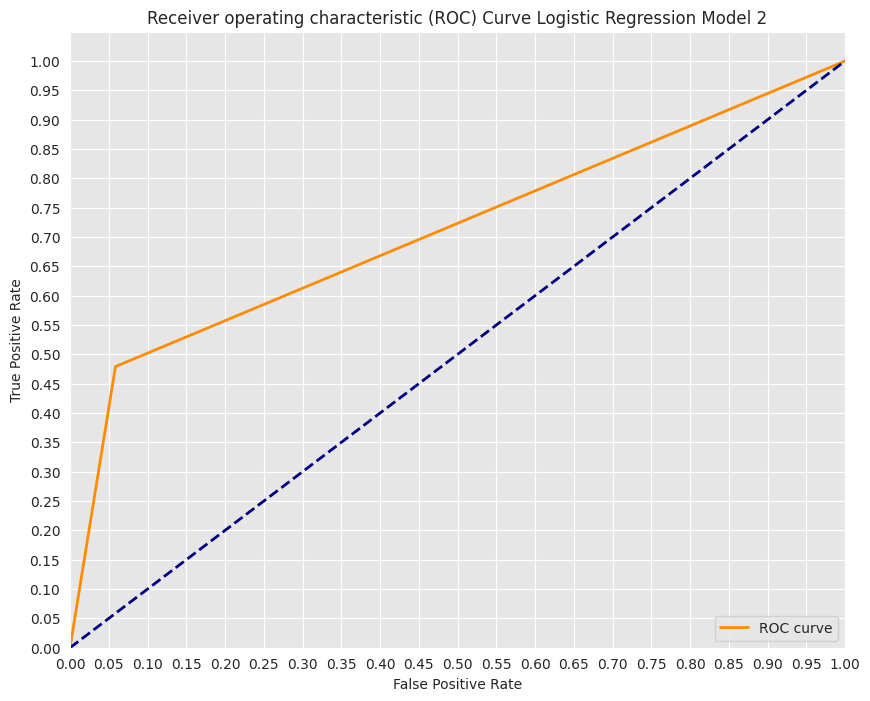

In [ ]:
# ROC Curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr_lr2, tpr_lr2)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_lr2, tpr_lr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve Logistic Regression Model 2')
plt.legend(loc='lower right')
plt.show()

Dalam visualisasi kurva ROC Logistic Regression Model 2 di atas, diperoleh nilai AUC sebesar 0.7102905917396232. Kurva ROC digunakan untuk mengukur kinerja model klasifikasi dalam membedakan antara kelas positif dan negatif.

Kurva ROC menunjukkan bahwa model klasifikasi yang telah dibangun memiliki kinerja yang cukup baik dalam memprediksi kelas yang benar pada dataset cuaca Australia yang tidak seimbang. Meskipun AUC-nya sedikit lebih rendah dari model sebelumnya, model masih mampu membedakan kelas positif dan negatif dengan tingkat akurasi yang dapat diterima.

### Support Vector Machine (SVM) 

In [ ]:
svm_classi = svm.SVC(kernel='linear', probability=True)

In [ ]:
svm_classi.fit(X_train_transformed, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred = svm_classi.predict(X_test_transformed)

In [ ]:
# Predict Probabilitas
svm_classi.predict_proba(X_train_transformed)

array([[0.92506993, 0.07493007],
       [0.94678939, 0.05321061],
       [0.92903479, 0.07096521],
       ...,
       [0.8714131 , 0.1285869 ],
       [0.26259963, 0.73740037],
       [0.72963898, 0.27036102]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print("Skor akurasi SVM:", accuracy)

Skor akurasi SVM: 0.8402997387597965


In [ ]:
# Model Evaluation
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred)
print('ROC AUC Score: {}'.format(auc(fpr_svm, tpr_svm)))

ROC AUC Score: 0.7007181664936081


Hasil evaluasi menggunakan metode SVM menunjukkan bahwa model klasifikasi memperoleh skor ROC AUC sebesar 0.7007181664936081.

AUC: 0.7007181664936081


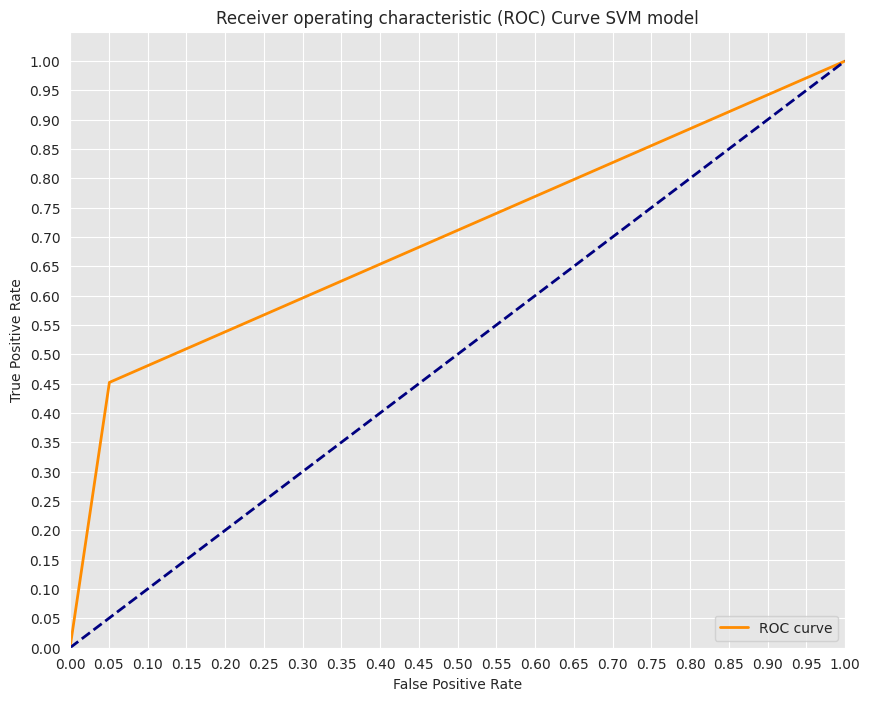

In [ ]:
# ROC Curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr_svm, tpr_svm)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_svm, tpr_svm, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve SVM model')
plt.legend(loc='lower right')
plt.show()

Berdasarkan analisis data cuaca Australia menggunakan dataset dari Kaggle, dilakukan evaluasi model klasifikasi SVM dengan menggunakan ROC AUC Score. Hasil evaluasi menunjukkan bahwa model ini memiliki ROC AUC Score sebesar 0.7007181664936081.

Melalui kurva ROC, model klasifikasi SVM mampu mempertahankan tingkat True Positive Rate yang konsisten seiring dengan peningkatan False Positive Rate dengan score 0.7007181664936081. Ini menunjukkan bahwa model SVM memiliki kemampuan yang baik dalam mengidentifikasi kelas positif dengan tingkat kesalahan yang relatif rendah dalam memprediksi kelas negatif.

## Model Inference 

In [ ]:
lr1.fit(X_train_transformed, y_train)
y_pred_lr1 = lr1.predict(X_test_transformed)

In [ ]:
scaler_ = StandardScaler()
scaler_.fit(X_train_transformed, y_train);

Misalkan diketahui data berikut untuk memprediksi kemungkinan besok akan hujan atau tidak:

    -Rainfall: 0.7 mm
    -RainToday: 0 (No)
    -Sunshine: 7.8 
    -Evaporation: 3.5
    -MaxTemp: 30.2
    -Humidity3pm: 55.0%
    -Cloud3pm: 6.4%
    -Pressure3pm: 1008.33 hpa
    -WindGustSpeed: 37.3
    -Temp3pm: 28.7

In [ ]:
Rainfall = float(input("Rainfall:"))
RainToday = int(input('Type 1 for Yes and 0 for No:'))
Sunshine = float(input("Sunshine hour:"))
Evaporation=float(input("Evaporation:"))
MaxTemp=float(input("MaxTemp:"))
Humidity3pm = float(input("Humidity percentation at 3 PM:"))
Cloud3pm=float(input("Cloud percentation at 3 PM:"))
Pressure3pm= float(input("Pressure at 3 PM:"))
WindGustSpeed = float(input("Wind Gust Speed:"))
Temp3pm = float(input("Temp at 3 PM:"))


val = [Rainfall,RainToday,Sunshine,Evaporation,MaxTemp,Humidity3pm,Cloud3pm,Pressure3pm,WindGustSpeed,Temp3pm]
val = scaler_.transform([val])
val = val.reshape(10,)

print(val)

val_predict = lr1.predict([val])

if val_predict == 1:
    print('Prediksi bernilai 1, maka diprediksi besok akan turun hujan')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka diprediksi besok tidak akan turun hujan')
else:
    print('Prediksi tidak valid')

Rainfall:0.7
Type 1 for Yes and 0 for No0
Sunshine hour:7.8
Evaporation:3.5
MaxTemp:30.2
Humidity percentation at 3 PM:55.0
Cloud percentation at 3 PM:6.4
Pressure at 3 PM:1008.33 
Wind Gust Speed:37.3
Temp at 3 PM:28.7
[ 7.00000000e-01 -5.39464893e-17  7.80000000e+00  3.50000000e+00
  3.02000000e+01  5.50000000e+01  6.40000000e+00  1.00833000e+03
  3.73000000e+01  2.87000000e+01]
Prediksi bernilai 0, maka diprediksi besok tidak akan turun hujan


## Kesimpulan

1. Dari 23 atribut yang ada, diambil 10 atribut yang paling berpengaruh dalam memprediksi kemungkinan besok akan hujan (RainTomorrow), diantaranya adalah Rainfall, RainToday, Sunshine, Evaporation, MaxTemp, Humidity3pm, Cloud3pm, Pressure3pm, WindGustSpeed, dan Temp3pm.

2. Model pengujian pada project ini ada 2, yaitu Logistic Regression dan SVM. Berdasarkan model dan prediksi yang sudah dibuat, didapatkan nilai akurasi dan nilai ROC AUC dari setiap model, berikut rinciannya:

    * Logistic regression model 1 
        - Nilai Akurasi: 0.776
        - Nilai ROC AUC: 0.775
    * Logistic Regression model 2
        - Nilai Akurasi: 0.840
        - Nilai ROC AUC: 0.710
    * SVM  
        - Nilai Akurasi: 0.840
        - Nilai ROC AUC: 0.701

3. Berdasarkan hasil evaluasi dari model yang diuji seperti dipoin sebelumnya, dapat ditarik kesimpulan sebagai berikut:

    * Logistic Regression Model 1 memiliki akurasi sebesar 0.776 dan ROC AUC sebesar 0.775. Model ini menunjukkan performa yang baik dalam memprediksi kemungkinan hujan besok.

    * Logistic Regression Model 2 memiliki akurasi yang lebih tinggi, yaitu 0.840, namun ROC AUC-nya lebih rendah, yaitu 0.710. Meskipun akurasi model ini tinggi, performa dalam membedakan kelas positif dan negatif (hujan dan tidak hujan) tidak sebaik model pertama.

    * SVM memiliki akurasi sebesar 0.840 dan ROC AUC sebesar 0.701. Meskipun akurasi sama dengan model sebelumnya, ROC AUC-nya lebih rendah yaitu sebesar 0.701, sehingga performa model ini dalam membedakan antara kelas positif dan negatif pada dataset cuaca Australia tergolong lebih rendah.

  Berdasarkan kesimpulan ini, jika kita mempertimbangkan baik akurasi maupun ROC AUC, Logistic Regression Model 1 adalah model yang paling baik dalam memprediksi kemungkinan hujan besok. Model ini memiliki akurasi yang baik dan mampu membedakan antara kelas positif dan negatif dengan baik.
